# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. 2252616
2. 2111901
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [681]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#import folium
#from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

In [682]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp.head(5)

,Country,year,GDP
0,Afghanistan,1992,no data
1,Albania,1992,0.843
2,Algeria,1992,49.217
3,Andorra,1992,no data
4,Angola,1992,9.395


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

In [683]:
# Pivot Dataframe into a clearer structure and set index
pivot_gdp = gdp.pivot(index='Country', columns='year', values='GDP')

In [684]:
# Replace "no data" with NaN for better handling and then check for the amount of NaN entries
pivot_gdp.replace('no data', np.nan, inplace=True)
pivot_gdp['NaN_count'] = pivot_gdp.isna().sum(axis=1)

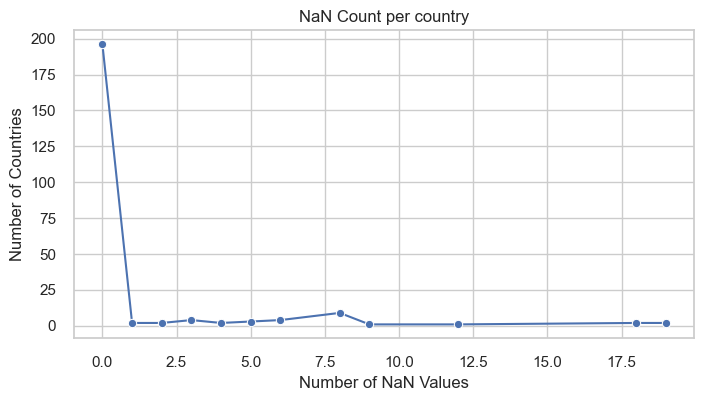

In [685]:
# Draw a plot of the NaN occurences
# Set the style of the plot
sns.set_style('whitegrid')

# Count the frequency of each NaN count
nan_count_freq = pivot_gdp['NaN_count'].value_counts().sort_index()

# Create line plot
plt.figure(figsize=(8,4))
sns.lineplot(x=nan_count_freq.index, y=nan_count_freq.values, marker='o')

plt.title('NaN Count per country')
plt.xlabel('Number of NaN Values')
plt.ylabel('Number of Countries')
plt.show()

In [686]:
# There is no country with no entries at all
pivot_gdp[pivot_gdp['NaN_count'] == 37]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,


In [687]:
# All countries with an NaN count for => 9 years are dropped
# This means they have less than 75% of the total timespan of 30 years covered
# Qualitative analysis also showed that most of their NaN values where next to each other which made them less suitable for interpolation

gdp_clean = pivot_gdp[pivot_gdp['NaN_count'] < 9]

In [688]:
# Convert entries to numeric
gdp_clean2 = gdp_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [689]:
# Fill NaNs with the average of the surrounding values where it is possible
# (window set at five limits the amount of NaNs that can be filled this way)
# Fill the remaining NaNs via interpolation

final_gdp = gdp_clean2.fillna(gdp_clean2.rolling(5, min_periods=2, center=True, axis=1).mean())
final_gdp2 = final_gdp.interpolate(method='linear', axis=1, limit_direction='both')

In [690]:
#Short check if there are still NaN-Values
final_gdp2['NaN_count2'] = final_gdp2.isna().sum(axis=1)
final_gdp2[final_gdp2['NaN_count2'] > 0]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

In [691]:
# Drop years in the future
final_gdp2.drop(columns=[2023,2024,2025,2026,2027,2028], axis=0, inplace=True)

In [692]:
# Generate a list of all countries to eliminate Regions and other umbrella terms via visual inspection
final_gdp2.index.values.tolist()

['ASEAN-5',
 'Advanced economies',
 'Africa (Region)',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia and the Caucasus',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe ',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Emerging and Develo

In [693]:
# Create blacklist with No-Country entries
blacklist = ['ASEAN-5', 'Advanced economies', 'Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia and the Caucasus', 'East Asia','Eastern Europe ', 'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies',  'Euro area', 'Europe', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)',  'Middle East (Region)', 'Middle East and Central Asia',  'North Africa', 'North America',  'Other advanced economies', 'Pacific Islands ',  'South America', 'South Asia', 'Southeast Asia',  'Sub-Saharan Africa (Region) ',  'Sub-Saharan Africa',  'West Bank and Gaza', 'Western Europe', 'Western Hemisphere (Region)', 'World']

In [694]:
# Drop blacklist from dataframe
final_gdp3 = final_gdp2.drop(blacklist)

# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [695]:
# added continent data
dbContinents = pd.read_csv("continents.csv")
continentsList = dbContinents["Country"].to_list()

# comparing if leading 20 countries are in continent data table
dbLeadingCountries = final_gdp3[2022].sort_values().tail(20)
countryList = dbLeadingCountries.index.to_list()



for country in countryList[:]:
    if (country in continentsList):
       #  print(country)
        countryList.remove(country)
countryList


['Tuerkiye, Republic of',
 'Korea, Republic of',
 "China, People's Republic of",
 'United States']

In [696]:
dbContinents["Country"] = dbContinents["Country"].replace(
    "Turkey", "Tuerkiye, Republic of")
dbContinents["Country"] = dbContinents["Country"].replace(
    "Korea, South", "Korea, Republic of")
dbContinents["Country"] = dbContinents["Country"].replace(
    "China", "China, People's Republic of")
dbContinents["Country"] = dbContinents["Country"].replace(
    "US", "United States")

dbContinents = dbContinents.set_index("Country")
dbBarTable = pd.merge(dbLeadingCountries, dbContinents,
                      left_index=True, right_index=True)
dbBarTable


,2022,Continent
Country,,
Switzerland,807.234,Europe
"Tuerkiye, Republic of",905.527,Asia
Netherlands,993.681,Europe
Saudi Arabia,1108.149,Asia
Indonesia,1318.807,Asia
Spain,1400.520,Europe
Mexico,1414.101,North America
"Korea, Republic of",1665.246,Asia
Australia,1701.893,Oceania


20


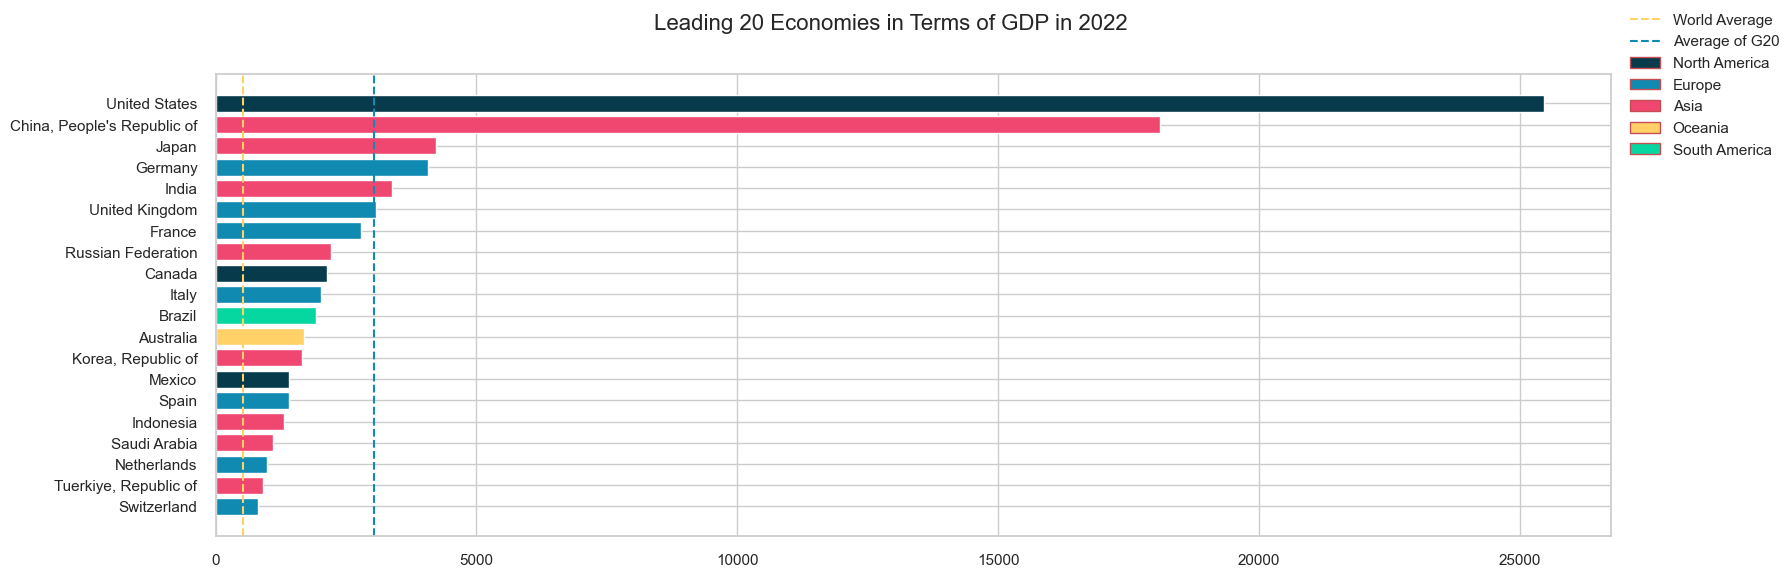

In [697]:
import seaborn as sns
import matplotlib.lines as mlines
from matplotlib.patches import Patch

values = dbBarTable[2022]
print(len(values))
treshhold = final_gdp2.loc["World"][2022]/len(final_gdp3[2022])

# https://www.bundesregierung.de/breg-de/themen/internationale-zusammenarbeit-g7-g20/das-ist-g20-387324#:~:text=Der%20G20%20geh%C3%B6ren%2019%20Staaten,S%C3%BCdkorea%2C%20T%C3%BCrkei%20und%20die%20USA%20.
treshholdG20 = final_gdp2.loc["Advanced economies"][2022]/19
labels = values.index.to_list()

fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle('Leading 20 Economies in Terms of GDP in 2022', fontsize=16)

y_pos = np.arange(len(labels))

colors = {'North America': '#073a4b', 'Europe': '#108ab1',
          'Asia': '#f04770', 'Oceania': '#ffd167', 'South America': '#06d7a0'}

ax.barh(y=y_pos, width=values,
        color=dbBarTable['Continent'].map(colors))
ax.set_yticks(y_pos, labels=labels)
ax.axvline(x=treshhold, linestyle='--', color="#ffd167")
ax.axvline(x=treshholdG20, linestyle='--', color="#108ab1")

continents = ['North America', 'Europe', 'Asia', 'Oceania', 'South America']
legend_elements = [mlines.Line2D([], [], color='#ffd167', linestyle='--',
                                 markersize=15, label='World Average'), mlines.Line2D([], [], color='#108ab1', linestyle='--',
                                                                                      markersize=15, label='Average of G20'),
                   Patch(facecolor='#073a4b', edgecolor='r',
                         label='North America'),
                   Patch(facecolor='#108ab1', edgecolor='r',
                         label='Europe'),
                   Patch(facecolor='#f04770', edgecolor='r',
                         label='Asia'),
                   Patch(facecolor='#ffd167', edgecolor='r',
                         label='Oceania'),
                   Patch(facecolor='#06d7a0', edgecolor='r',
                         label='South America'),


                   ]


fig.legend(handles=legend_elements)


C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\2737987636.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(grid[0, 0:2])
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\2737987636.py:73: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


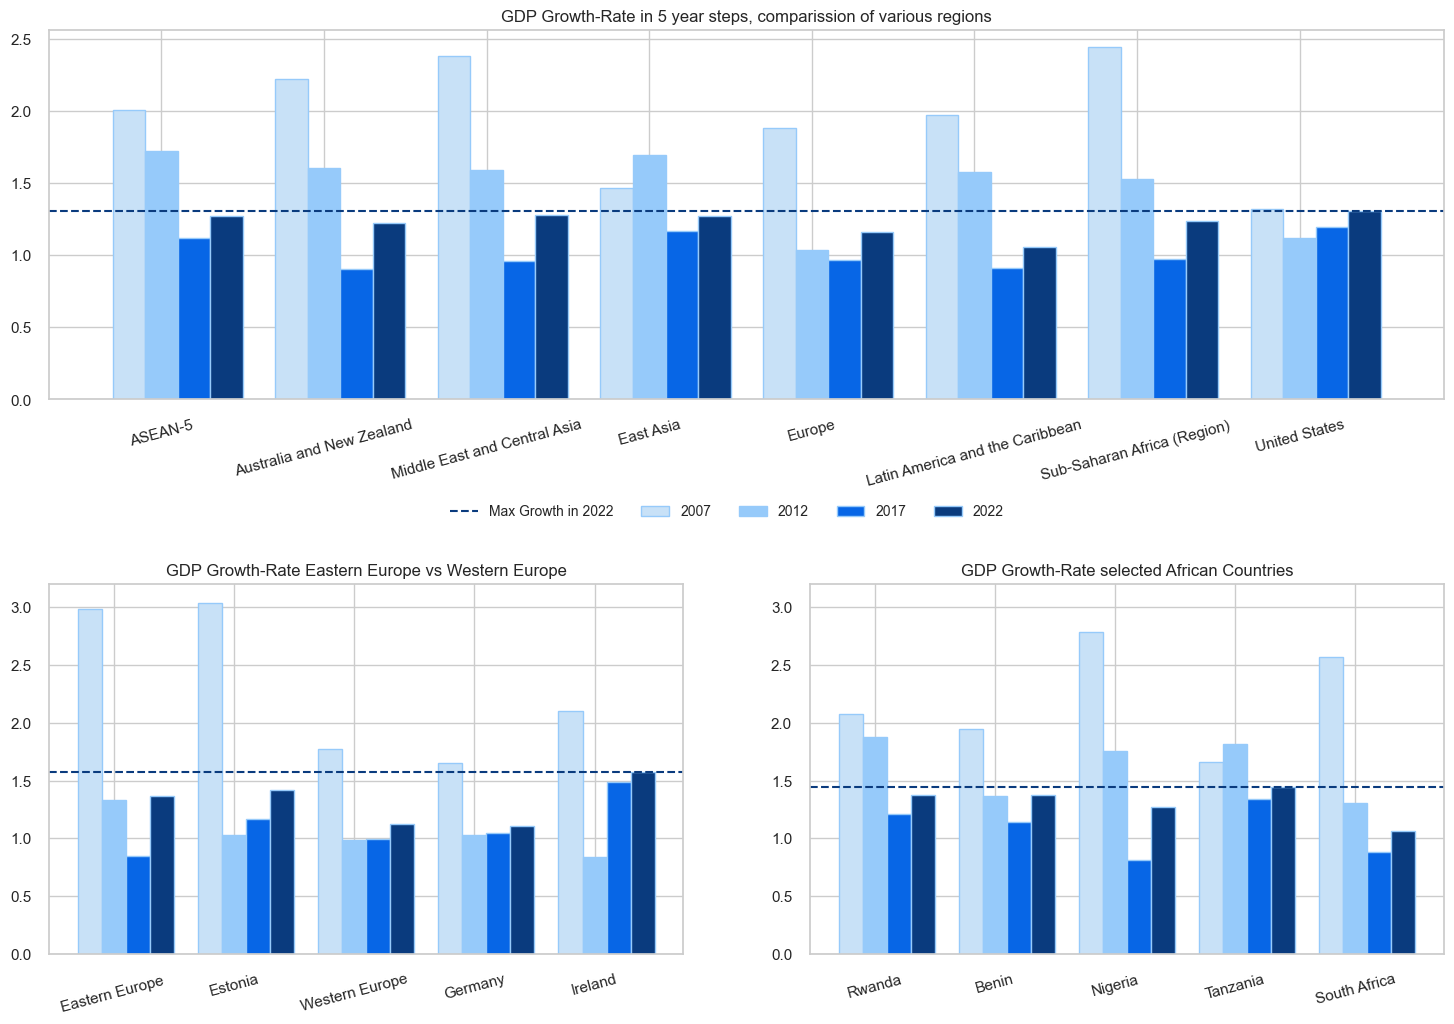

In [698]:

import matplotlib as mpl

fig, axes = plt.subplots(figsize=(18, 12))
grid = plt.GridSpec(2, 2, hspace=0.5)
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[1, 1])
axes = [ax1, ax2, ax3]

regionsList = ['ASEAN-5', 'Australia and New Zealand', 'Middle East and Central Asia',  'East Asia',
               'Europe', 'Latin America and the Caribbean', 'Sub-Saharan Africa (Region) ',  'United States']
europeList = ['Eastern Europe ', 'Estonia',
              'Western Europe', 'Germany', 'Ireland']
africaList = ['Rwanda', 'Benin', 'Nigeria', 'Tanzania', 'South Africa']

processLists = [regionsList, europeList, africaList]

# sub area world
# sub area europe


def getData(areasList):

    dbEmerging = final_gdp2.loc[areasList]
    dbEmerging = dbEmerging[[2002, 2007, 2012, 2017, 2022]]
    data = {2007: dbEmerging[2007]/dbEmerging[2002],
            2012: dbEmerging[2012]/dbEmerging[2007],
            2017: dbEmerging[2017]/dbEmerging[2012],
            2022: dbEmerging[2022]/dbEmerging[2017]}
    dbGrowthRate = pd.DataFrame(data=data)
    return dbGrowthRate


listCounter = 0
for list in processLists:

    dbGrowthRate = getData(list)
    maxGrowth2022 = max(dbGrowthRate[2022].to_list())

    dbGrowthRate = dbGrowthRate.T

    regions = dbGrowthRate.columns.to_list()
    x = dbGrowthRate.values.tolist()
    region = np.arange(len(regions))

    width = 0.2

    colors = ['#c8e1f7', '#96cafa',  '#0766e6', '#0a3b7e']

    i = 0
    while i < len(dbGrowthRate):
        offset = width*i
        axes[listCounter].bar(height=x[i], x=region + offset,
                              width=width, color=colors[i], edgecolor='#96cafa')
        i = i+1

    axes[listCounter].set_xticks(region + width, regions, rotation=15)
    axes[listCounter].axhline(y=maxGrowth2022, linestyle='--', color=colors[3])

    listCounter = listCounter+1


axes[0].set_title(
    "GDP Growth-Rate in 5 year steps, comparission of various regions")
axes[1].set_title(
    "GDP Growth-Rate Eastern Europe vs Western Europe")
axes[2].set_title(
    "GDP Growth-Rate selected African Countries")

axes[1].set_ylim((0, 3.2))
axes[2].set_ylim((0, 3.2))

mpl.style.use('seaborn')

fig.legend(loc='center', ncols=5, labels=[
           "Max Growth in 2022"]+dbGrowthRate.index.to_list())


In [699]:
# checking who where the leading economies in every year
top = 10

dfEdit = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])
dfTop20All = dfEdit[1992].sort_values().tail(top)
dfEdit = dfEdit.drop(columns=[1992])

for year in dfEdit.columns:
    dfTop20Current = dfEdit[year].sort_values().tail(top)
    dfTop20All = pd.merge(dfTop20All, dfTop20Current,
                          left_index=True, right_index=True, how='outer')
listdfTop20All = dfTop20All.index.to_list()

dfTop20All = dfEdit.loc[listdfTop20All]
dfTop20All


year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,429.184,546.764,770.860,851.146,883.862,864.307,599.642,655.454,559.982,509.798,...,2471.718,2456.055,1800.046,1796.622,2063.519,1916.934,1873.286,1476.092,1648.699,1924.134
Canada,579.059,579.913,605.941,630.598,655.010,634.004,678.417,744.631,738.968,760.149,...,1846.595,1805.751,1556.508,1527.996,1649.266,1725.300,1743.725,1647.598,2001.487,2139.840
"China, People's Republic of",617.433,561.686,730.996,860.468,957.991,1024.167,1088.346,1205.532,1333.649,1465.829,...,9624.928,10524.241,11113.508,11226.897,12265.327,13841.812,14340.600,14862.564,17759.307,18100.044
France,1324.236,1396.653,1602.130,1606.035,1454.555,1505.184,1494.634,1366.243,1377.667,1500.348,...,2811.918,2856.701,2439.436,2472.282,2594.235,2792.223,2729.171,2635.921,2957.423,2784.020
Germany,2072.457,2209.934,2588.002,2498.113,2214.694,2242.065,2197.125,1948.843,1945.804,2077.016,...,3733.859,3890.095,3357.926,3468.896,3689.547,3976.246,3888.655,3886.555,4262.767,4075.395
India,284.194,333.014,366.600,399.791,423.189,428.767,466.867,476.610,493.953,523.970,...,1856.721,2039.127,2103.588,2294.797,2651.474,2702.930,2835.606,2671.596,3150.307,3386.403
Italy,1047.616,1080.544,1175.278,1312.783,1243.228,1271.701,1253.690,1147.183,1168.032,1275.867,...,2141.954,2162.567,1836.824,1876.554,1961.104,2092.881,2011.524,1895.692,2115.762,2012.013
Japan,4544.766,4998.798,5545.566,4923.393,4492.449,4098.363,4635.982,4968.360,4374.710,4182.845,...,5212.328,4896.995,4444.931,5003.678,4930.837,5040.881,5117.995,5048.790,5005.537,4233.538
"Korea, Republic of",392.731,463.432,566.595,610.164,570.594,382.855,497.254,576.483,547.743,626.989,...,1370.633,1484.489,1466.039,1499.362,1623.074,1725.373,1651.423,1644.676,1810.966,1665.246


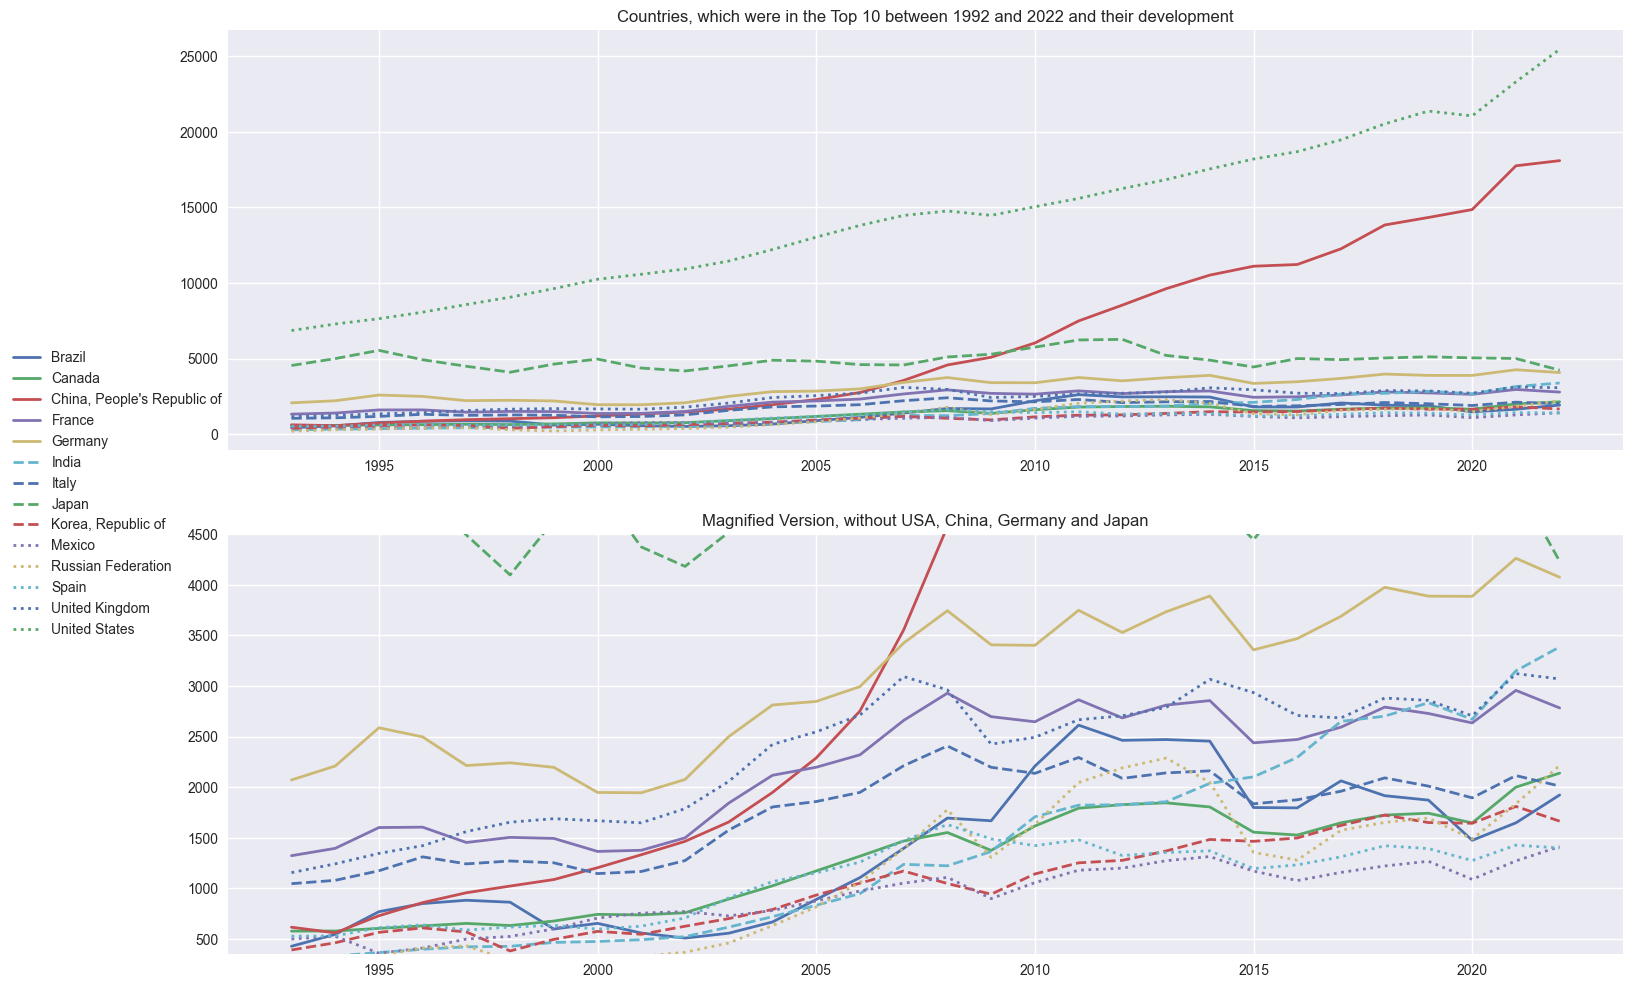

In [700]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))


y = dfTop20All.columns.to_list()
x = dfTop20All.values.tolist()

i = 0

linewidth = 2
linestyle = "-"

while (i < len(x)):
    if (i > 4 and i < 9):
        linestyle = "--"
    if (i >= 9):
        linestyle = ":"

    axes[0].plot(y, x[i], linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(y, x[i], linestyle=linestyle, linewidth=linewidth)
    i = i+1

axes[1].set_ylim([350, 4500])
axes[0].set_title(
    'Countries, which were in the Top 10 between 1992 and 2022 and their development')
axes[1].set_title('Magnified Version, without USA, China, Germany and Japan')

fig.legend(dfTop20All.index.to_list(), loc=6)


#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [701]:
# In task 1 we had removed countries with too much Nan values, as well we replaced NaN values by average value. To find out in which year we replaced most values by estimations, we decided
# to analyise the original dataframe again


dfNan = pd.DataFrame(columns=['year', 'NaNcount'], data=[])

pivot_gdp.columns
i = 0
for element in pivot_gdp.columns:
    NaNcount = pivot_gdp[element].isna().sum()
    new_row = [element, NaNcount]
    dfNan.loc[len(dfNan)] = new_row
dfNan = dfNan.set_index(["year"])
dfNan.drop(dfNan.tail(1).index, inplace=True)  # drop NaN-count row


In [702]:
minValue = dfNan["NaNcount"].min()
minValue


1

In [703]:
minYears = dfNan[dfNan["NaNcount"] == 1]
minYearsList = minYears.index.tolist()
minYearsList


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [704]:
# as we can see we can decide between the area 2011 up to 2020, they all have the same minimal value of one
import random
minYears.index.tolist()

rand_idx = int(random.random() * len(minYearsList))
random_num = minYearsList[rand_idx]
random_num

# outcome of last iteration was 2016


2013

In [705]:
import folium
from folium.plugins import MarkerCluster


ModuleNotFoundError: No module named 'folium'

In [ ]:
# get lat and lon from each country by using csv file from kaggle: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state?resource=download&select=world_country_and_usa_states_latitude_and_longitude_values.csv

latLons = pd.read_csv("lat_lon.csv", sep=",")
latLons


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [ ]:
# check if all countries are included
countryList = final_gdp3.index.to_list()
latLonCountryList = latLons["country"].to_list()

for country in countryList[:]:
    if (country in latLonCountryList):
       #  print(country)
        countryList.remove(country)
countryList


['Bahamas, The',
 'Brunei Darussalam',
 'Cabo Verde',
 "China, People's Republic of",
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 "Cote d'Ivoire",
 'Eswatini',
 'Gambia, The',
 'Hong Kong SAR',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Lao P.D.R.',
 'Micronesia, Fed. States of',
 'Myanmar',
 'North Macedonia ',
 'Russian Federation',
 'Sao Tome und Principe',
 'Slovak Republic',
 'Taiwan Province of China',
 'Tuerkiye, Republic of']

In [ ]:
# as a next step we have to find the missing values by ourselves, by printing the latLonCountryList
latLonCountryList

# original <-- name from the longtidue and latitude dataframe
# Bahamas, The <-- Bahamas
# Brunei Darussalem <-- Brunei
# China, People's Republic of <-- China
# Congo, Dem. Rep. of the <-- Congo [DRC]
# Congo, Republic of <-- Congo [Republic]
# Cote d'Ivoire <-- Côte d'Ivoire
# Eswatini <-- Swaziland
# Gambia, The <-- Gambia
# Hong Kong SAR <-- Hong Kong
# Korea, Republic of <-- North Korea
# Kyrgyz Republic <-- Kyrgyzstan
# Lao P.D.R. <-- Laos
# Micronesia, Fed. States of <-- Micronesia
# Myanmar <-- Myanmar [Burma]
# North Macedonia <-- Macedonia [FYROM]
# Russian Federation <-- Russia
# Sao Tome und Principe <-- São Tomé and Príncipe
# Slovak Republic <-- Slovakia
# Taiwan Province of China <-- Taiwan
# Tuerkiye, Republic of <-- Turkey


['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Netherlands Antilles',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Congo [DRC]',
 'Central African Republic',
 'Congo [Republic]',
 'Switzerland',
 "Côte d'Ivoire",
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland 

In [ ]:
# correct countries names

latLons["country"] = latLons["country"].replace("Bahamas", "Bahamas, The")
latLons["country"] = latLons["country"].replace("Brunei", "Brunei Darussalem")
latLons["country"] = latLons["country"].replace(
    "China", "China, People's Republic of")
latLons["country"] = latLons["country"].replace(
    "Congo [DRC]", "Congo, Dem. Rep. of the")
latLons["country"] = latLons["country"].replace(
    "Congo [Republic]", "Congo, Republic of ")
latLons["country"] = latLons["country"].replace(
    "Côte d'Ivoire", "Cote d'Ivoire")
latLons["country"] = latLons["country"].replace("Swaziland", "Eswatini")
latLons["country"] = latLons["country"].replace("Gambia", "Gambia, The")
latLons["country"] = latLons["country"].replace("Hong Kong", "Hong Kong SAR")
latLons["country"] = latLons["country"].replace(
    "South Korea", "Korea, Republic of")
latLons["country"] = latLons["country"].replace(
    "Kyrgyzstan", "Kyrgyz Republic")
latLons["country"] = latLons["country"].replace("Laos", "Lao P.D.R.")
latLons["country"] = latLons["country"].replace(
    "Micronesia", "Micronesia, Fed. States of")
latLons["country"] = latLons["country"].replace("Myanmar [Burma]", "Myanmar")
latLons["country"] = latLons["country"].replace(
    "Macedonia [FYROM]", "North Macedonia ")
latLons["country"] = latLons["country"].replace("Russia", "Russian Federation")
latLons["country"] = latLons["country"].replace(
    "São Tomé and Príncipe", "Sao Tome und Principe")
latLons["country"] = latLons["country"].replace("Slovakia", "Slovak Republic")
latLons["country"] = latLons["country"].replace(
    "Taiwan", "Taiwan Province of China")
latLons["country"] = latLons["country"].replace(
    "Turkey", "Tuerkiye, Republic of")

latLons.head(5)


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [ ]:
# remove unnescsary columns

latLons = latLons.drop(columns=["country_code",	"usa_state_code",
                                "usa_state_latitude",	"usa_state_longitude", "usa_state"])
latLons = latLons.set_index(["country"])

latLons


,latitude,longitude
country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615
...,...,...
Yemen,15.552727,48.516388
Mayotte,-12.827500,45.166244
South Africa,-30.559482,22.937506


In [ ]:
dfMap = pd.merge(final_gdp3, latLons, left_index=True, right_index=True)
dfMap.head(20)


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2017,2018,2019,2020,2021,2022,NaN_count,NaN_count2,latitude,longitude
Albania,0.8430,1.4610,2.3610,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,13.053,15.157,15.399,15.161,18.310,18.509,0.0,0,41.153332,20.168331
Algeria,49.2170,50.9630,42.4260,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,167.498,174.868,171.673,145.656,163.138,195.415,0.0,0,28.033886,1.659626
Andorra,1.4880,1.4880,1.4880,1.488,1.488,1.488,1.488,1.488,1.429,1.547,...,2.993,3.217,3.155,2.885,3.330,3.400,8.0,0,42.546245,1.601554
Angola,9.3950,6.8190,4.9650,6.197,7.994,9.388,7.958,7.526,11.166,10.930,...,122.022,101.353,84.516,57.139,74.791,121.417,0.0,0,-11.202692,17.873887
Antigua and Barbuda,0.4990,0.5350,0.5890,0.577,0.634,0.681,0.728,0.766,0.826,0.800,...,1.468,1.606,1.688,1.370,1.471,1.682,0.0,0,17.060816,-61.796428
Argentina,255.7870,264.4290,287.8350,288.497,304.282,327.436,334.244,316.998,317.759,300.421,...,643.861,524.431,451.815,389.064,486.702,632.241,0.0,0,-38.416097,-63.616672
Armenia,0.1080,0.8350,0.6480,1.287,1.597,1.639,1.892,1.845,1.912,2.118,...,11.527,12.458,13.619,12.642,13.861,19.503,0.0,0,40.069099,45.038189
Aruba,1.3505,1.3505,1.3505,1.321,1.380,1.532,1.665,1.723,1.873,1.896,...,3.092,3.202,3.369,2.610,3.126,3.493,3.0,0,12.521110,-69.968338
Australia,318.0930,309.3080,353.3740,379.071,424.689,426.424,381.387,411.727,399.960,377.780,...,1381.624,1417.030,1385.258,1360.687,1646.391,1701.893,0.0,0,-25.274398,133.775136
Austria,195.5060,190.3830,203.9700,241.234,237.343,213.045,218.557,217.475,197.377,197.510,...,417.114,455.198,444.670,434.877,480.688,471.685,0.0,0,47.516231,14.550072


In [ ]:

# setting up color-palette (highest values: blue, lowest values red, in center area white)


i = 0
colors = []
while (i < 255):
    colors.append('#{:02X}{:02X}{:02X}'.format(
        255, i, i))
    i = i+1


i = 255
while (i > 0):
    colors.append('#{:02X}{:02X}{:02X}'.format(
        i, i, 255))
    i = i-1


In [ ]:
from heapq import nlargest, nsmallest

# since Chinas and USA's GDP is more than double as much as to the third strongest economy we cant select them as max value for the palette
# otherwise all the other countries nearly have the same color

res = nlargest(20, dfMap[2016])

# as we can see steps at the first 11th - 12th economies are very large, so we start at number 11 with the color palette, to be able to mark minor differences


def gdp_color(x, colors=colors):
    lowerbound = 0
    num_colors = len(colors)
    min_UR = lowerbound
    max_UR = res[11]  # selecting second strongest economy
    steps = np.linspace(min_UR, max_UR, num_colors+1)
    color = colors[min(np.digitize(x, steps)-1, len(colors)-1)]
    if x < lowerbound:
        color = "#FF0000"
    return color


In [ ]:
# for the map data we went back using the cleaned dataframe "final_gdp3"

map = folium.Map(location=[15, 15], zoom_start=3)

for country in dfMap.index:

    selectedCountry = dfMap.loc[country]

    popup = folium.Popup(
        f"{country}, GDP in year 2016: <br>{selectedCountry[2016]}", max_width=300)
    color = gdp_color(selectedCountry[2016])
    folium.Marker([selectedCountry["latitude"], selectedCountry["longitude"]], popup=popup, icon=folium.Icon(
        color='black', icon_color=color, icon="location-pin", prefix="fa")).add_to(map)

map


# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [706]:
# Import the libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [707]:
# Transform and Normalize GDP-Data
df_supervised = pd.DataFrame.transpose(final_gdp3)
df_supervised = df_supervised.drop(["NaN_count", "NaN_count2"])
df_supervised_norm = (df_supervised - df_supervised.mean())/df_supervised.std()

# Check for null-values
df_supervised_norm[df_supervised_norm.isnull().any(axis=1)]

Country,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,


In [708]:
#Define a List of all countrys
countrys = df_supervised_norm.columns.values

In [709]:
# Define the Linear Regression model
model_lin = LinearRegression(fit_intercept = True)


In [710]:
# 1. Create a working data frame out of the big dataframe for each country
# 2. Shift all independent variables for a maximum of 5 lags and exclude the values of the current year
# 3. Set the GDP as the dependent variable
# 4. Train the model based on past years (lag 1-5)
# 5. Predict GDP for values of X_test and calculate the mean squared error

max_lag = 5
Results = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results.loc[len(Results)] = new_row



In [711]:
# Group the results for better clarity
Results = Results.groupby(["Country"]).agg('sum')

In [712]:
# Have a look at the Results
Results.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.011117,0.014210,0.007611,0.024529,0.036404
Algeria,0.081713,0.083712,0.046907,0.052259,0.128371
Andorra,0.041531,0.028305,0.077305,0.134768,0.046322
Angola,0.235800,0.240116,0.125731,0.153186,0.338172
Antigua and Barbuda,0.221158,0.224911,0.194753,0.193524,0.179940


In [713]:
#Get the average MSE over all countries when using Linear Regression
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.09333258205030387
Average MSE for 2 lags is:  0.09820506569756104
Average MSE for 3 lags is:  0.06882933899900413
Average MSE for 4 lags is:  0.08256115552022665
Average MSE for 5 lags is:  0.11243771830486163


In [714]:
#Check if there is a better Performance with Decission Trees (Random Forest) by executing same steps as before but using a different model
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 123)
max_lag = 5
Results_RF = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_rf.fit(X_train, y_train)
        prediction_rf = model_rf.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_rf)}
        Results_RF.loc[len(Results_RF)] = new_row

In [715]:
#Get the average MSE over all coutnries when using Random Forest
Results_RF = Results_RF.groupby(["Country"]).agg('sum')
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_RF["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.12288185581036054
Average MSE for 2 lags is:  0.1235126147801029
Average MSE for 3 lags is:  0.08409984236336346
Average MSE for 4 lags is:  0.10113800307333448
Average MSE for 5 lags is:  0.11446646001503397


In [716]:
# As a last variant try out if we can improve the performance by using boosting model
model_gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2, random_state = 123)
max_lag = 5
Results_GB = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_gb.fit(X_train, y_train)
        prediction_gb = model_gb.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_gb)}
        Results_GB.loc[len(Results_GB)] = new_row

In [717]:
#Get the average MSE over all coutnries for using Boosting Method
Results_GB = Results_GB.groupby(["Country"]).agg('sum')
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_GB["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.1552264458247081
Average MSE for 2 lags is:  0.13538719993199566
Average MSE for 3 lags is:  0.099780566339399
Average MSE for 4 lags is:  0.11083865809543339
Average MSE for 5 lags is:  0.11838554636490288


In [718]:
#Insides to some specific countrys for better interpretation
Germany = pd.DataFrame()
print ("Germany")
Germany["LinearRegression"] = Results.loc["Germany"]
Germany["RandomForest"] = Results_RF.loc["Germany"]
Germany["Boosting"] = Results_GB.loc["Germany"]
print(Germany)

USA = pd.DataFrame()
print ("United States")
USA["LinearRegression"] = Results.loc["United States"]
USA["RandomForest"] = Results_RF.loc["United States"]
USA["Boosting"] = Results_GB.loc["United States"]
print(USA)

Egypt = pd.DataFrame()
print ("Egypt")
Egypt["LinearRegression"] = Results.loc["Egypt"]
Egypt["RandomForest"] = Results_RF.loc["Egypt"]
Egypt["Boosting"] = Results_GB.loc["Egypt"]
print(Egypt)

Germany
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.078209      0.221666  0.472698
MSE_lag2          0.037700      0.120702  0.152119
MSE_lag3          0.076867      0.103058  0.173252
MSE_lag4          0.164073      0.176413  0.215857
MSE_lag5          0.084489      0.166241  0.206642
United States
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.018163      0.083210  0.088006
MSE_lag2          0.029165      0.088781  0.062683
MSE_lag3          0.011993      0.032915  0.040768
MSE_lag4          0.012104      0.025842  0.049888
MSE_lag5          0.015913      0.039801  0.065374
Egypt
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.078500      0.157979  0.047001
MSE_lag2          0.074386      0.215516  0.228211
MSE_lag3          0.283910      0.066577  0.047034
MSE_lag4          0.548268      0.081762  0.074160
MSE_lag5          0.719058      0.106908  0.110093


In [719]:
#Have a look to the Values of GDP in the last 5 years of the above choosen countries

df_supervised_norm["Egypt"].tail()

year
2018    0.566255
2019    0.998072
2020    1.507934
2021    1.829600
2022    2.239274
Name: Egypt, dtype: float64

In [720]:
df_supervised_norm["Germany"].tail()

year
2018    1.217152
2019    1.101135
2020    1.098354
2021    1.596655
2022    1.348476
Name: Germany, dtype: float64

In [721]:
df_supervised_norm["United States"].tail()

year
2018    1.225060
2019    1.388151
2020    1.326502
2021    1.760186
2022    2.173630
Name: United States, dtype: float64

**General Interpretation**
- model with 3 lags (data from three years prior) yields the lowest MSE making it the most accurate for predicting next year's GDP 
- model with 5 lags in MSE is the least accurate, implying that older data may not be as effective for the prediction
- used ensemble methods are both least accurate when using only a few lags (1 or 2). However performance increases significantly when using 3 lags but decreases again afterwards --> Using only one lag in this case means there is no feature to split, therefore there is only one resulting decission tree in the end. Thus the method is very likely to overfitting. 

**Interpetation of specific countries with elevated MSE values**
- The results are varying a lot depending on which country there is a look at. 
- For example Germany, a country where GDP remains very similar over the year, linear regression performance above average.
- For countries like egypt, which has a lot of variance in GDP over the last 5 years, Ensembling Method performe much better, especially with more lags. 

#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*

**Prepocessing CSV Files**

In [722]:
# First import the additional data which we found at different sources (see sources in comments)
imports = pd.read_csv("TDS1/Importe.csv", sep=",") #Source: https://data.worldbank.org/indicator/BM.GSR.TOTL.CD
exports = pd.read_csv("TDS1/Exporte.csv", sep=",") #Source: https://data.worldbank.org/indicator/BX.GSR.TOTL.CD
population = pd.read_csv("TDS1/Populations.csv", sep = ",") #Source: https://data.worldbank.org/indicator/SP.POP.TOTL
unemployment = pd.read_csv("TDS1/Unemployment.csv", sep = ",") # Source: https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
nat_disasters = pd.read_csv("TDS1/natural-disasters.csv", sep = ",") #Source: https://ourworldindata.org/natural-disasters



**Imports - Preprocessing**

In [723]:
# Drop year before 1992 and "nonsense" - Columns
imports.drop(imports.iloc[:, 1:36], inplace = True, axis = 1)
imports.drop(["Unnamed: 67"], inplace = True, axis = 1)

#Rename the "Country" - Column and set as index
imports.rename(columns={'Country Name': 'Country'}, inplace=True)
imports.set_index(keys='Country', inplace=True)

In [724]:
# Investigate NaN
imports['NaN_count'] = imports.isna().sum(axis=1)

In [725]:
# Drop all rows with >= 9 NaN
imports_clean = imports[imports['NaN_count'] < 9]

In [726]:
# Delete NaN-Count column which was used above and is no longer needed
imports_clean.drop(['NaN_count'], axis=1, inplace=True)

# Fill the remaining NaN-Values by rolling and interpolation
imports_clean = imports_clean.fillna(imports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
imports_clean = imports_clean.interpolate(method='linear', axis=1, limit_direction='both')

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1864236994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean.drop(['NaN_count'], axis=1, inplace=True)


**Exports - Preprocessing**

In [727]:
# Drop year before 1992 and "nonsense" - Columns
exports.drop(exports.iloc[:, 1:36], inplace = True, axis = 1)
exports.drop(["Unnamed: 67"], inplace = True, axis = 1)

#Rename the "Country" - Column and set as index
exports.rename(columns={'Country Name': 'Country'}, inplace=True)
exports.set_index(keys='Country', inplace=True)

In [728]:
# Investigate NaN
exports['NaN_count'] = exports.isna().sum(axis=1)

In [729]:
# Drop all rows with >= 9 NaN
exports_clean = exports[exports['NaN_count'] < 9]

In [730]:
# Drop NaN-Count column which was used above and is no longer needed
exports_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1648263671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_clean.drop(['NaN_count'], axis=1, inplace=True)


In [731]:
# Fill the remaining NaN-Values by rolling and interpolation
exports_clean = exports_clean.fillna(exports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
exports_clean = exports_clean.interpolate(method='linear', axis=1, limit_direction='both')

**Population - Preprocessing**

In [732]:
# Drop year before 1992 and "nonsense" - Columns
population.drop(population.iloc[:, 1:36], inplace = True, axis = 1)
population.drop(["Unnamed: 67"], inplace = True, axis = 1)

#Rename the "Country" - Column and set as index
population.rename(columns={'Country Name': 'Country'}, inplace=True)
population.set_index(keys='Country', inplace=True)

In [733]:
# Investigate NaN
population['NaN_count'] = population.isna().sum(axis=1)


In [734]:
#There is only one column in the population - DataFrame with more than 9 NaN-Counts and this column is a mistake at all, therefore drop it in the next step
population[population['NaN_count'] > 9]

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,
Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


In [735]:
population.drop("Not classified", inplace = True)

In [736]:
#There are no remaining NaN-Values in the DataFrame and therefore no method to fill them is required
population.isna().sum().sum()

0

In [737]:
# Drop NaN-Count column which was used above and is no longer needed
population = population.drop(columns=["NaN_count"])

**Unemployment - Preprocessing**

In [738]:
# Drop year before 1992 and "nonsense" - Columns
unemployment.drop(unemployment.iloc[:, 1:36], inplace = True, axis = 1)
unemployment.drop(["Unnamed: 67"], inplace = True, axis = 1)

#Rename the "Country" - Column and set as index
unemployment.rename(columns={'Country Name': 'Country'}, inplace=True)
unemployment.set_index(keys='Country', inplace=True)

In [739]:
# Investigate NaN
unemployment['NaN_count'] = unemployment.isna().sum(axis=1)

In [740]:
# Drop all rows with >= 9 NaN
unemployment_clean = unemployment[unemployment['NaN_count'] < 9]

In [741]:
# Drop NaN-Count column which was used above and is no longer needed
unemployment_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\92734170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_clean.drop(['NaN_count'], axis=1, inplace=True)


In [742]:
# Fill the remaining NaN-Values by rolling and interpolation
unemployment_clean = unemployment_clean.fillna(unemployment_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
unemployment_clean = unemployment_clean.interpolate(method='linear', axis=1, limit_direction='both')

**Natural disasters - Preprocessing**

In [743]:
#Due to large number of columns in the dataframe of natural disasters (cause there is a distinction between the type of natural disaster and the impacet (death, injured, etc.))
#we first filter the dataframe only for "deaths" - Column, Country and corresponding year
filtered_nat_disasters = nat_disasters.loc[:, nat_disasters.columns.str.contains('deaths|Country|Year', case = False)]

#NaN-Values in this case mean there where no deaths at all, therefore fill them with 0
filtered_nat_disasters = filtered_nat_disasters.fillna(0)

#Identifiy all column-names which shows the number of deaths (other way around, it is the same than ignoring country and year)
death_columns = filtered_nat_disasters.columns[filtered_nat_disasters.columns.str.contains('deaths', case = False)]

#Calculate the sum of all deaths which occured due to different types of natural disaster (we are only interested in the whole impact)
filtered_nat_disasters["Sum of deaths"] = filtered_nat_disasters[death_columns].sum(axis=1)

#Drop all detailed columns and just hold the sum
nat_disasters = filtered_nat_disasters [["Country name", "Year", "Sum of deaths"]]

In [744]:
#Rename the Country name column and set it as index and pivot the dataframe
nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)
nat_dis_piv = nat_disasters.pivot(index='Country', columns='Year', values='Sum of deaths')


C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\236649117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)


In [745]:
#Drop all years before 1992
nat_dis_piv.drop(nat_dis_piv.iloc[:, 0:92], inplace = True, axis = 1)

In [746]:
nat_dis_piv.fillna(0, inplace = True)

In [747]:
# Short look inside the data
nat_dis_piv.head(10)

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1228.0,450.0,320.0,762.0,140.0,350.0,14246.0,140.0,74.0,662.0,...,310.0,1150.0,892.0,168.0,452.0,226.0,422.0,656.0,792.0,2692.0
Africa,1200.0,374.0,3594.0,2576.0,902.0,6498.0,928.0,1950.0,2880.0,3488.0,...,1896.0,1184.0,2658.0,2040.0,4006.0,2048.0,5492.0,2682.0,1114.0,9480.0
Albania,22.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,14.0,0.0,102.0,0.0,0.0,0.0
Algeria,42.0,74.0,466.0,0.0,8.0,8.0,0.0,68.0,96.0,1842.0,...,0.0,12.0,24.0,0.0,0.0,12.0,16.0,0.0,206.0,88.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,230.0,...,18.0,0.0,150.0,226.0,22.0,16.0,142.0,66.0,44.0,0.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Argentina,90.0,30.0,48.0,12.0,0.0,0.0,38.0,0.0,74.0,70.0,...,112.0,54.0,38.0,0.0,2.0,4.0,28.0,6.0,30.0,0.0


**Clean and merge the DataFrames**

In [748]:
#Clean DataFrames (We identified the "wrong" countries by running the code in the following cell first and had a look at the matches with a match score between 90 and 99%)
blacklist_nat_dis = ["Africa", "American Samoa", "East Germany", "Netherlands Antilles", "North Yemen", "Serbia and Montenegro", "South Yemen", "Somalia", "South Sudan", "United States Virgin Islands", "West Germany"]
blacklist_pop = ["American Samoa", "Somalia", "South Sudan"]
blacklist_unemp = ["Somalia", "South Sudan"]

nat_dis_piv = nat_dis_piv.drop(blacklist_nat_dis)
population = population.drop(blacklist_pop)
unemployment_clean = unemployment_clean.drop(blacklist_unemp)

In [749]:
# MATCH THE COUNTRY NAMES
# Standardize country names using fuzzywuzzy, a string matching library in python.
#  A warning is printed if the matched name has a similarity score below 90%, also we use copies of the original dataframes

from fuzzywuzzy import process

def match_countries(df, countries):
    df_copy = df.copy()
    matches = []
    for country in df_copy.index:
        match, score = process.extractOne(country, countries)
        if score < 90:
            continue
        elif score < 99:
            print(f"Warning! Middle match score: {country} matched with {match} with score {score}")
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
        else:
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
    df_copy = df_copy[df_copy.index.isin(matches)]
    return df_copy

countries = final_gdp3.index.unique()

print("Importe:")
imp_clean_copy = match_countries(imports_clean, countries)
print("Exporte:")
exp_clean_copy = match_countries(exports_clean, countries)
print("Nat_Dis:")
nat_dis_clean_copy = match_countries(nat_dis_piv, countries)
print("Population:")
pop_clean_copy = match_countries(population, countries)
print("Unemployment:")
unemployment_clean_copy = match_countries(unemployment_clean, countries)



Importe:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90


Warning! Middle match score: Egypt, Arab Rep. matched with Egypt with score 90
Warning! Middle match score: Hong Kong SAR, China matched with Hong Kong SAR with score 90
Warning! Middle match score: St. Kitts and Nevis matched with Saint Kitts and Nevis with score 90
Warning! Middle match score: Korea, Rep. matched with Korea, Republic of with score 90
Warning! Middle match score: Sao Tome and Principe matched with Sao Tome und Principe with score 95
Warning! Middle match score: St. Vincent and the Grenadines matched with Saint Vincent and the Grenadines with score 94
Warning! Middle match score: Venezuela, RB matched with Venezuela with score 95
Exporte:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Dem. Rep. matched with Congo, Dem. Rep. of the with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90
Warning! Middle match score: Egypt, Arab Rep. matched with Eg

In [750]:
#Drop the NaN-Count-Columns of the final-Dataframe of exercise 1)
final_gdp3 = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])

In [751]:
# Normalize the numerical data of all dataframes

imp_clean_copy_norm = (imp_clean_copy - imp_clean_copy.mean())/imp_clean_copy.std()
exp_clean_copy_norm = (exp_clean_copy - exp_clean_copy.mean())/exp_clean_copy.std()
nat_dis_clean_copy_norm = (nat_dis_clean_copy - nat_dis_clean_copy.mean())/nat_dis_clean_copy.std()
pop_clean_copy_norm = (pop_clean_copy - pop_clean_copy.mean())/pop_clean_copy.std()
unemp_clean_copy_norm = (unemployment_clean_copy - unemployment_clean_copy.mean())/unemployment_clean_copy.std()
final_gdp3_norm = (final_gdp3 - final_gdp3.mean())/final_gdp3.std()

In [752]:
#Ensure type of all columns is identical (integer)

imp_clean_copy_norm.columns = imp_clean_copy_norm.columns.astype(int)
exp_clean_copy_norm.columns = exp_clean_copy_norm.columns.astype(int)
nat_dis_clean_copy_norm.columns = nat_dis_clean_copy_norm.columns.astype(int)
pop_clean_copy_norm.columns = pop_clean_copy_norm.columns.astype(int)
unemp_clean_copy_norm.columns = unemp_clean_copy_norm.columns.astype(int)
final_gdp3_norm.columns = final_gdp3_norm.columns.astype(int)

In [753]:
#Check if there are still duplicates in some dataframes (no)
print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Natural Disasters Dataframe: ", len(nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Unemployment Dataframe: ", len(unemp_clean_copy_norm[unemp_clean_copy_norm.index.value_counts() > 1]))

Number of Duplicates in Import Dataframe:  0
Number of Duplicates in Export Dataframe:  0
Number of Duplicates in Population Dataframe:  0
Number of Duplicates in Natural Disasters Dataframe:  0
Number of Duplicates in Unemployment Dataframe:  0


C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1253096346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1253096346.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1253096346.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1253096346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Natural Disas

In [754]:
# Exclude all countries that are not in all dfs
all_countries = set(imp_clean_copy_norm.index).intersection(exp_clean_copy_norm.index, nat_dis_clean_copy_norm.index, pop_clean_copy_norm.index, final_gdp3_norm.index, unemp_clean_copy_norm.index)

final_gdp3_norm = final_gdp3_norm[final_gdp3_norm.index.isin(all_countries)]
imp_clean_copy_norm = imp_clean_copy_norm[imp_clean_copy_norm.index.isin(all_countries)]
exp_clean_copy_norm = exp_clean_copy_norm[exp_clean_copy_norm.index.isin(all_countries)]
nat_dis_clean_copy_norm = nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.isin(all_countries)]
pop_clean_copy_norm = pop_clean_copy_norm[pop_clean_copy_norm.index.isin(all_countries)]
unemp_clean_copy_norm = unemp_clean_copy_norm[unemp_clean_copy_norm.index.isin(all_countries)]

In [755]:
#check length of all dataframes to ensure it is the same for all
print(len(final_gdp3_norm.index))
print(len(imp_clean_copy_norm))
print(len(exp_clean_copy_norm))
print(len(pop_clean_copy_norm))
print(len(nat_dis_clean_copy_norm))
print(len(unemp_clean_copy_norm))

116
116
116
116
116
116


In [756]:
# Sort index in all dataframes
imp_clean_copy_norm.sort_index(inplace=True)
exp_clean_copy_norm.sort_index(inplace=True)
nat_dis_clean_copy_norm.sort_index(inplace=True)
pop_clean_copy_norm.sort_index(inplace=True)
unemp_clean_copy_norm.sort_index(inplace=True)
final_gdp3_norm.sort_index(inplace=True)


In [757]:
# Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm, unemp_clean_copy_norm], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population", "Unemployment"])

In [758]:
# Short look if everything worked fine
data.head()

1992      1993      1994      1995      1996      1997  \
    Country                                                                  
GDP Albania    -0.223614 -0.216550 -0.215819 -0.222353 -0.227229 -0.224413   
    Argentina   0.202454  0.199411  0.205303  0.168643  0.183245  0.212412   
    Armenia    -0.224842 -0.217540 -0.218346 -0.224536 -0.229414 -0.225246   
    Australia   0.306581  0.270400  0.301984  0.292636  0.347399  0.345387   
    Azerbaijan -0.223029 -0.216791 -0.215971 -0.222989 -0.227260 -0.222124   

                    1998      1999      2000      2001  ...      2013  \
    Country                                             ...             
GDP Albania    -0.216944 -0.210166 -0.205535 -0.202207  ... -0.258801   
    Argentina   0.216998  0.175182  0.160267  0.140843  ...  0.132347   
    Armenia    -0.217818 -0.211841 -0.207364 -0.204301  ... -0.259887   
    Australia   0.278675  0.291514  0.255945  0.230349  ...  0.725289   
    Azerbaijan -0.214694 -0.208481 -0.203452 -0.200417  ... -0.218701   

                    2014      2015      2016      2017      2018      2019  \
    Country                                                                  
GDP Albania    -0.254160 -0.235935 -0.233922 -0.235789 -0.232625 -0.228109   
    Argentina   0.089916  0.151059  0.092080  0.122359  0.037134 -0.004842   
    Armenia    -0.255183 -0.236447 -0.234709 -0.236655 -0.234055 -0.229020   
    Australia   0.648187  0.513255  0.514902  0.541232  0.509937  0.472701   
    Azerbaijan -0.215403 -0.211740 -0.218386 -0.219709 -0.215698 -0.211342   

                    2020      2021      2022  
    Country                                   
GDP Albania    -0.222368 -0.222372 -0.219001  
    Argentina  -0.030628 -0.010262  0.043766  
    Armenia    -0.223660 -0.224387 -0.218575  
    Australia   0.467627  0.514899  0.501732  
    Azerbaijan -0.208250 -0.205928 -0.196995  

[5 rows x 31 columns]

In [759]:
#check for null-values
data.isna().sum().sum()

0

In [760]:
#swap the level of multiindexes (as preparation for the following code)
data = data.swaplevel(0,1)

In [761]:
#Rename indices
data.index.names = ['Country', 'Variable']

**Visualize the current dataset**

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


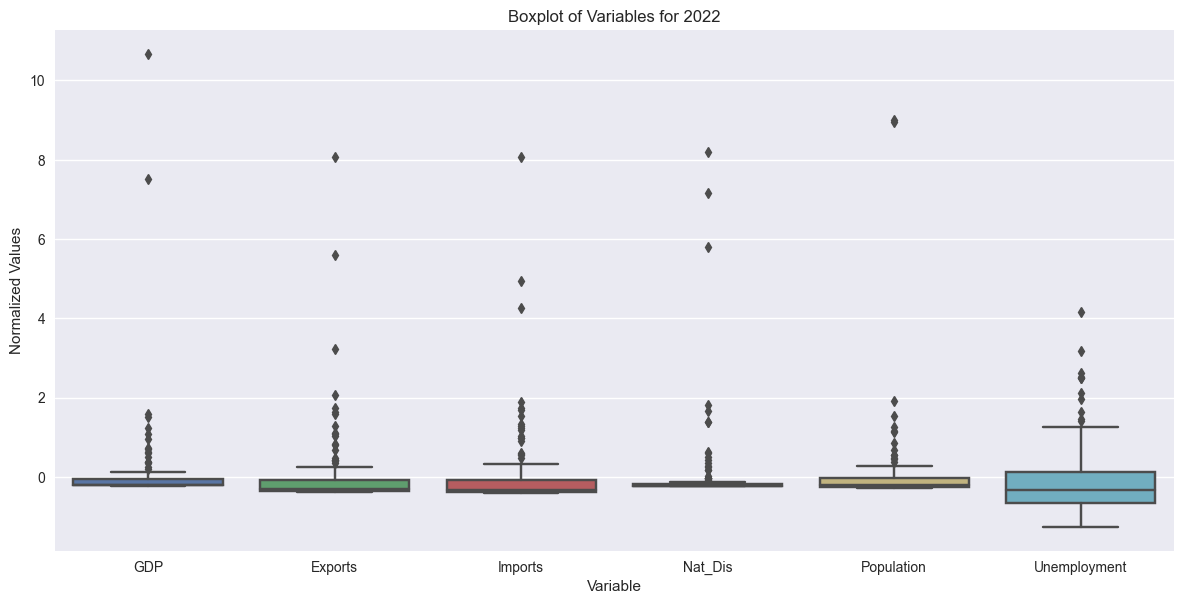

In [762]:
# Reset the multi-index DataFrame
df_reset = data.reset_index()

# Subset the dataframe for the last year (2022) and transform
last_year_df = df_reset[df_reset.columns[:2].tolist() + [2022]].melt(id_vars=df_reset.columns[:2], var_name='Year', value_name='Values')

# Create boxplot grid and provide labels
g = sns.catplot(x='Variable', y='Values', kind="box", data=last_year_df, height=6, aspect=2)
g.set_axis_labels("Variable", "Normalized Values")
plt.title('Boxplot of Variables for 2022')
plt.show()

Interpretation:
- It can be seen that the boxes are very flat and somewhere between -0.5 and 0, which means that the majority of the data for each variable is located near and below the mean
- Exception to this is the unemployment dataset, whose variance bettween the data is thus significantly higher
- Furthermore we have significant outliers for almost every variable. A qualitative analysis is showing, that those outliers seem genuine. For the population for example 

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


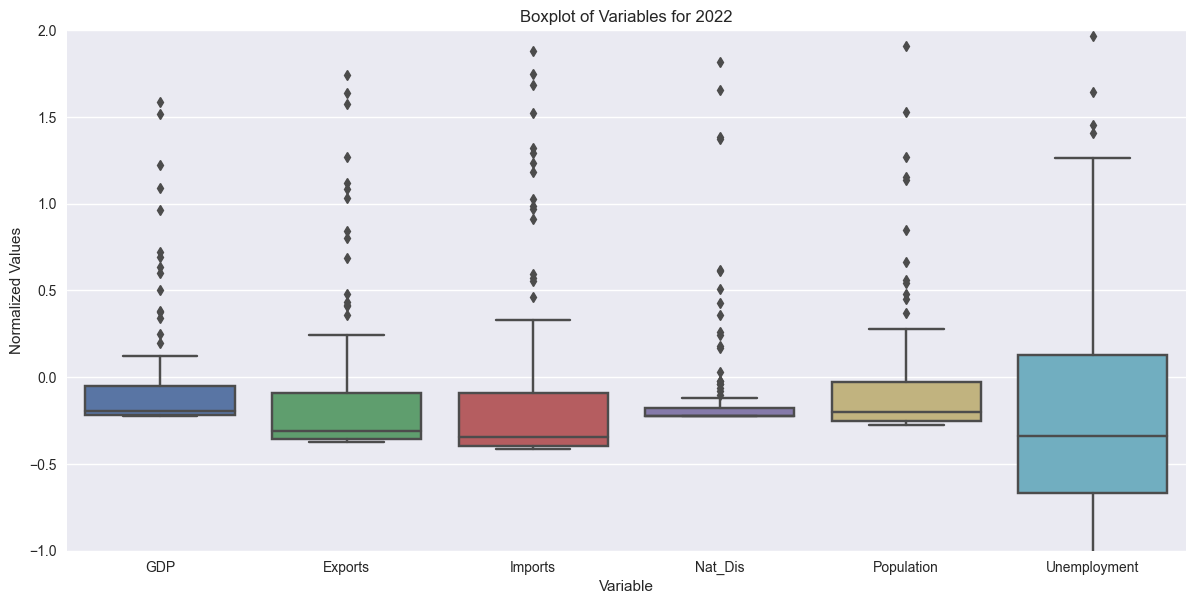

In [763]:
# The same boxplot but with adjusted y-axis that excludes the outliers but better displays the boxes and median
g = sns.catplot(x='Variable', y='Values', kind="box", data=last_year_df, height=6, aspect=2)
g.set_axis_labels("Variable", "Normalized Values")
plt.ylim(-1, 2)
plt.title('Boxplot of Variables for 2022')
plt.show()

**Try different Prediction Methods with new data**

In [764]:
#Get a list of all countries which remains after adding the new data
countrys_mod = data.index.get_level_values(0).unique()
countrys_mod

Index(['Albania', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan',
       'Bahamas, The', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       ...
       'Tunisia', 'Uganda', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Vanuatu', 'Venezuela', 'Vietnam', 'Zambia'],
      dtype='object', name='Country', length=116)

In [797]:
#Using linear Regression Model to predict next years GDP based on all data of the past years (1-5 lags) for each country
max_lag = 5
Results_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
  
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results_mod.loc[len(Results_mod)] = new_row

In [798]:
#Group dataframe for better clarity
Results_mod = Results_mod.groupby(["Country"]).agg('sum')

In [799]:
#Show results of MSE for all countries per lag
Results_mod.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.000020,0.000030,0.000056,0.000262,0.000076
Argentina,0.002272,0.012113,0.015569,0.036686,0.009903
Armenia,0.000027,0.000013,0.000268,0.000462,0.000090
Australia,0.005551,0.001568,0.003089,0.160681,0.006016
Azerbaijan,0.000051,0.000072,0.000043,0.000009,0.000008


In [800]:
# Print the avarage MSE over all countries after modifying the data with additional data and compare it with the results before
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_mod["MSE_lag"+str(i)]), "   Average MSE 3a: ", pd.Series.mean(Results["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.008955599783622887    Average MSE 3a:  0.09333258205030387
Average MSE for 2 lags is:  0.008672999340813649    Average MSE 3a:  0.09820506569756104
Average MSE for 3 lags is:  0.022815642321585082    Average MSE 3a:  0.06882933899900413
Average MSE for 4 lags is:  0.159603375855493    Average MSE 3a:  0.08256115552022665
Average MSE for 5 lags is:  0.07951396864929328    Average MSE 3a:  0.11243771830486163


Interpretation Linear Regression before and after modification:
- In toal the performance increased a lot through the additional data
- In the case of 4 lags there is a big loss of performance through the additional data. Therefore we will have a check below:

In [801]:
# We can see that Italy, Germany and Venezuela are the main reasons why the performance with the additional data is so bad with 4 lags.
Results_mod[Results_mod["MSE_lag4"]> 0.08]
#But why? 

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Australia,0.005551,0.001568,0.003089,0.160681,0.006016
Canada,0.048071,0.139811,0.032414,0.129746,0.018676
"China, People's Republic of",0.084829,0.125454,0.794494,1.385996,0.065010
France,0.023614,0.023070,0.032953,0.125785,0.359070
Germany,0.055028,0.017584,0.139466,1.762102,6.640031
India,0.001926,0.017281,0.097136,0.094952,0.013933
Indonesia,0.006605,0.011501,0.035001,0.260620,0.017414
Italy,0.020042,0.048109,0.063307,8.912862,0.268574
Japan,0.108026,0.086802,0.137419,0.331178,0.373041


In [771]:
# To find out what's the reason for worse predicition for Italy with lag 4 we take a closer look to the data of Italy
df_Italy = data.loc["Italy"]
df_Italy

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Variable,,,,,,,,,,,,,,,,,,,,,
GDP,1.952234,1.438251,1.374681,1.382613,1.558164,1.442637,1.443471,1.325487,1.125676,1.144690,...,1.132275,1.089539,0.883475,0.881659,0.870237,0.867931,0.793094,0.741981,0.727452,0.634509
Exports,2.353472,1.909154,1.861255,1.928976,1.902499,1.835995,1.895856,1.701191,1.499562,1.605377,...,1.131645,1.101507,1.010138,1.009216,1.033159,1.015702,0.955381,0.865401,0.929329,1.034447
Imports,2.366256,2.286875,2.297691,2.392911,2.493406,2.267795,2.314966,2.104838,1.928266,2.073828,...,1.399402,1.389828,1.282155,1.339196,1.346230,1.348352,1.319818,1.224617,1.222381,1.291442
Nat_Dis,-0.199489,-0.128726,-0.003742,-0.227176,-0.135629,-0.144787,-0.054125,-0.124639,-0.040557,-0.108907,...,-0.129963,-0.164118,-0.153816,1.630984,-0.044792,-0.099727,-0.263423,-0.197545,-0.206988,-0.179296
Population,0.247273,0.240020,0.232802,0.225728,0.218991,0.212573,0.206303,0.200283,0.194609,0.189156,...,0.153862,0.153024,0.148094,0.142969,0.138027,0.133222,0.124875,0.119477,0.114443,0.110208
Unemployment,0.248519,0.313167,0.429047,0.498718,0.493198,0.557961,0.580292,0.492188,0.374573,0.195487,...,0.647704,0.779666,0.694200,0.702206,0.696289,0.651825,0.571006,0.201769,0.315981,0.162012


In [778]:
#Calculate the Change Rates for Italy Data
Italy_Change = pd.DataFrame()
Italy_Change["GDP_Change_Rate"] = df_Italy.loc["GDP"].pct_change()*100
Italy_Change["Exp_Change_Rate"] = df_Italy.loc["Exports"].pct_change()*100
Italy_Change["Imp_Change_Rate"] = df_Italy.loc["Imports"].pct_change()*100
Italy_Change["Nat_Dis_Change_Rate"] = df_Italy.loc["Nat_Dis"].pct_change()*100
Italy_Change["Pop_Change_Rate"] = df_Italy.loc["Population"].pct_change()*100
Italy_Change["Unemp_Change_Rate"] = df_Italy.loc["Unemployment"].pct_change()*100
Italy_Change

,GDP_Change_Rate,Exp_Change_Rate,Imp_Change_Rate,Nat_Dis_Change_Rate,Pop_Change_Rate,Unemp_Change_Rate
1992,NaN,NaN,NaN,NaN,NaN,NaN
1993,-26.327965,-18.879280,-3.354714,-35.472262,-2.932878,26.013576
1994,-4.419942,-2.508878,0.472965,-97.093127,-3.007217,37.002441
1995,0.576983,3.638419,4.144131,5971.146794,-3.038633,16.238545
1996,12.697058,-1.372546,4.199711,-40.297867,-2.984861,-1.106745
1997,-7.414287,-3.495617,-9.048303,6.752167,-2.930429,13.131263
1998,0.057801,3.260384,2.080043,-62.617402,-2.949675,4.002233
1999,-8.173614,-10.267931,-9.076941,130.278711,-2.918310,-15.182727
2000,-15.074527,-11.852208,-8.388843,-67.460702,-2.832644,-23.896391
2001,1.689098,7.056396,7.548807,168.530681,-2.802123,-47.810594


Interpretation: Data from Italy vary particularly widely in some years. Accordingly, it can happen that years are to be predicted which lie under a particularly strong fluctuation. In the selected Random State 123, this is the case for Italy. In general, however, it is not Italy that is particularly difficult to predict, since the performance of Italy at 4 lags in random state 124 is above average and the result is therefore only a coincidence. 

In [ ]:
#Use RandomForest again for prediction with similar lags like in linear regression before
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 123)
max_lag = 5
Results_RF_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_rf.fit(X_train, y_train)
        prediction_rf = model_rf.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_rf)}
        Results_RF_mod.loc[len(Results_RF_mod)] = new_row

In [ ]:
# Group results for better clarity
Results_RF_mod = Results_RF_mod.groupby(["Country"]).agg('sum')

In [ ]:
#Print Results of Random Forest in comparison to performance without the additional data
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_RF_mod["MSE_lag"+str(i)]), "   Average MSE 3a: ", pd.Series.mean(Results_RF["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.0052611927666125595    Average MSE 3a:  0.12288185581036054
Average MSE for 2 lags is:  0.00413938200480252    Average MSE 3a:  0.1235126147801029
Average MSE for 3 lags is:  0.002840911616964427    Average MSE 3a:  0.08409984236336346
Average MSE for 4 lags is:  0.0024718383148809274    Average MSE 3a:  0.10113800307333448
Average MSE for 5 lags is:  0.0019159189674005474    Average MSE 3a:  0.11446646001503397


Interpretation Random Forest before and after modification:
- In case of RF we can see there is a much better Performance in total than without the additional data
- Also there is a constantly decreasing MSE when using more data
- The performance is also much better than using linear regression

In [ ]:
#Use Boosting again
model_gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2, random_state = 123)
max_lag = 5
Results_GB_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_gb.fit(X_train, y_train)
        prediction_gb = model_gb.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_gb)}
        Results_GB_mod.loc[len(Results_GB_mod)] = new_row

In [ ]:
#Group Results for better clarity
Results_GB_mod = Results_GB_mod.groupby(["Country"]).agg('sum')

In [ ]:
#Print Results of Boosting in comparison to performance without the additional data
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_GB_mod["MSE_lag"+str(i)]), "Average MSE 3a: ", pd.Series.mean(Results_GB["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.0030402286014970183 Average MSE 3a:  0.1552264458247081
Average MSE for 2 lags is:  0.0031788988584561207 Average MSE 3a:  0.13538719993199566
Average MSE for 3 lags is:  0.0026769850028556504 Average MSE 3a:  0.099780566339399
Average MSE for 4 lags is:  0.002917794675985577 Average MSE 3a:  0.11083865809543339
Average MSE for 5 lags is:  0.002331421279199618 Average MSE 3a:  0.11838554636490288


Interpretation Gradient Boosting before and after modification:
- Performance in total is much better than without the additional data
- Performance with only a few lags is better than in random forest
- Performance with mor lags still gets better but more slowley than with Random Froest (maybe because Boosting is very senstiv to overfitting and the amount of data is too much with all the new feature + lags?)

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [ ]:
#Package Import
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#Give second index a name (to make it callable)
data.index = data.index.set_names("Kind", level = 1)

In [ ]:
#Look at the data
data.head(2)

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,Kind,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.223614,-0.216550,-0.215819,-0.222353,-0.227229,-0.224413,-0.216944,-0.210166,-0.205535,-0.202207,...,-0.258801,-0.254160,-0.235935,-0.233922,-0.235789,-0.232625,-0.228109,-0.222368,-0.222372,-0.219001
Argentina,GDP,0.202454,0.199411,0.205303,0.168643,0.183245,0.212412,0.216998,0.175182,0.160267,0.140843,...,0.132347,0.089916,0.151059,0.092080,0.122359,0.037134,-0.004842,-0.030628,-0.010262,0.043766


In [ ]:
# Transform sturcture of data again to make it usable for kmeans
data_piv = data.pivot_table(index = "Country", columns = ["Kind"], aggfunc = sum)


In [ ]:
#Look if transformation worked like expected
data_piv.head(2)

1992                                                        \
Kind        Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                     
Albania   -0.351126 -0.223614 -0.370434 -0.169572  -0.228921     3.457043   
Argentina -0.126970  0.202454 -0.192312 -0.056550   0.040710    -0.210396   

               1993                                ...      2021            \
Kind        Exports       GDP   Imports   Nat_Dis  ...   Imports   Nat_Dis   
Country                                            ...                       
Albania   -0.348439 -0.216550 -0.366745 -0.137844  ... -0.385422 -0.210616   
Argentina -0.089675  0.199411 -0.169081 -0.120748  ... -0.192540 -0.156190   

                                       2022                                \
Kind      Population Unemployment   Exports       GDP   Imports   Nat_Dis   
Country                                                                     
Albania    -0.255243     0.893948 -0.359977 -0.219001 -0.399476 -0.226105   
Argentina   0.027102     0.177981 -0.186853  0.043766 -0.172984 -0.226105   

                                   
Kind      Population Unemployment  
Country                            
Albania    -0.256635     0.847112  
Argentina   0.027644    -0.133685  

[2 rows x 186 columns]

In [ ]:
#fit kmeans with different Ks to find best
distortions = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans.fit(data_piv)
    distortions.append(kmeans.inertia_)

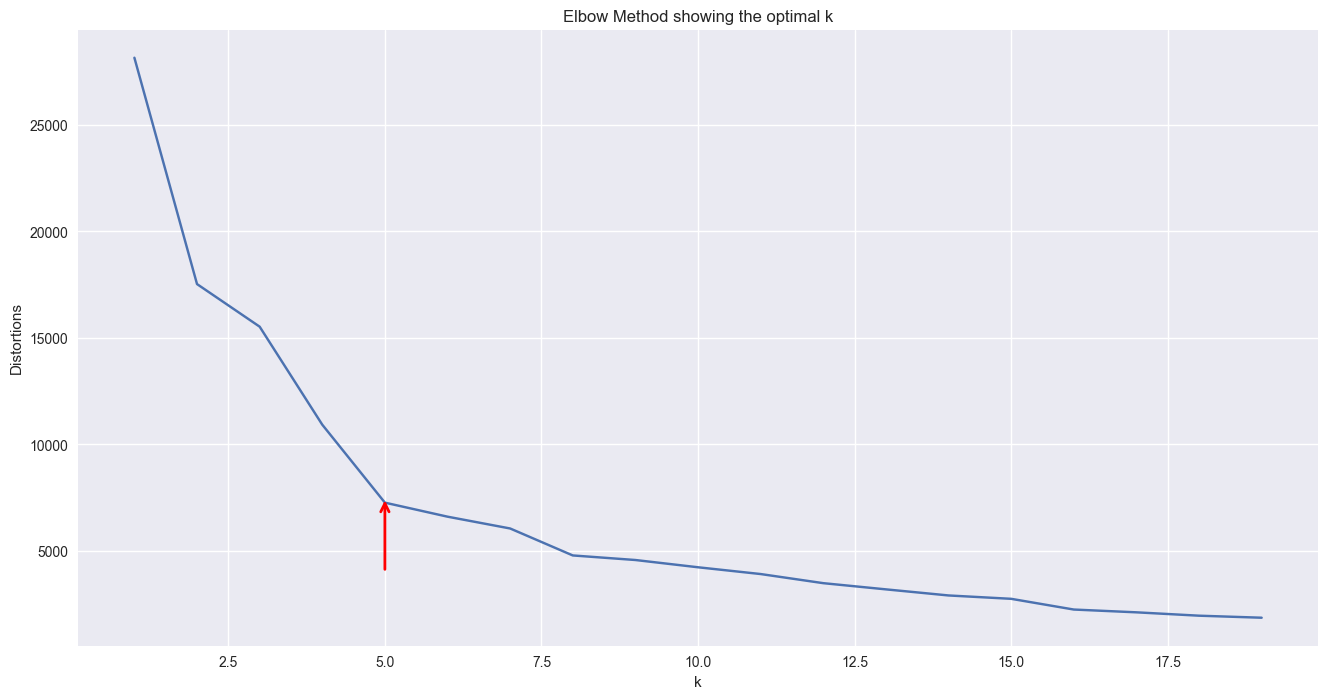

In [ ]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (5,7500), xytext = (5,4000), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()


In [ ]:
#Use KMeans with the above identified optimal clusters of 5
opt_clusters = 5
kmeans = KMeans(n_clusters=opt_clusters)
y_kmeans = kmeans.fit_predict(data_piv)
y_kmeans

c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 0, 1, 0, 4, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 4, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4,
       2, 1, 1, 1, 1, 1])

In [ ]:
#Add new column with the cluster of each country, which can be used for later interpretation
data_piv['Cluster'] = y_kmeans

In [ ]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2, random_state=123)
reduced_features = pca.fit_transform(data_piv.values)
data_piv["pca_1"] = reduced_features[:,0]
data_piv["pca_2"] = reduced_features[:,1]

<class 'list'>


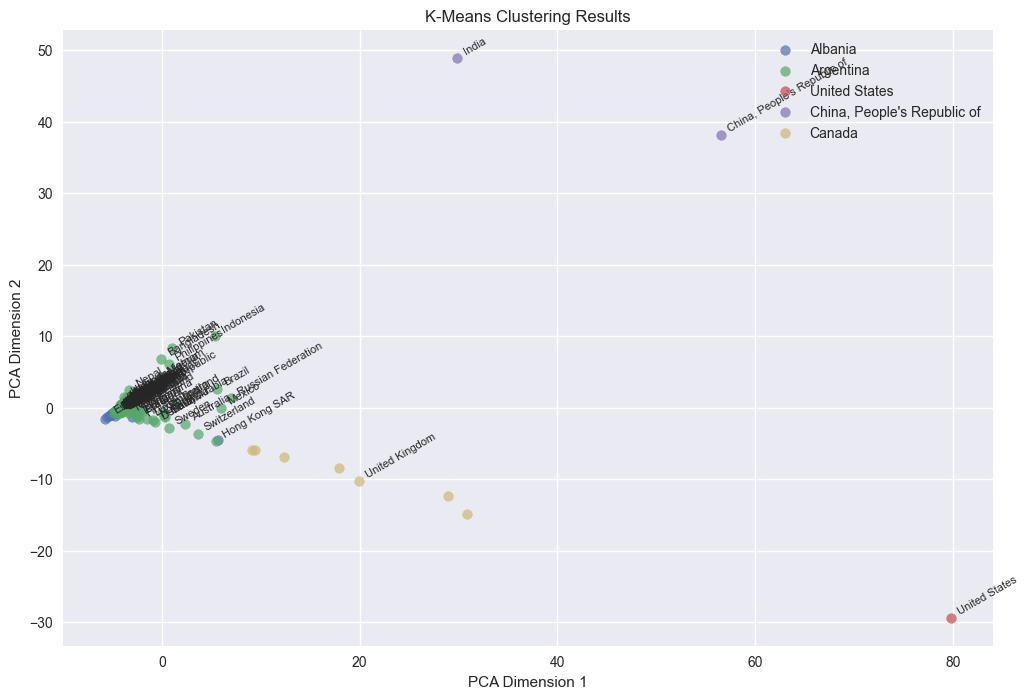

In [ ]:
#Visualize the clusters after PCA

# The labels assigned to our clusters in the KMeans algorithm (such as "cluster 1", "cluster 2", and so on) are determined by the sequence in which the centroids of these clusters are calculated,
# rather than any inherent properties of the data being clustered. Consequently, even when the random state is fixed, the same group of countries might receive different labels across multiple runs.
# To provide a point of reference during interpretation of our results, we always identify a particular country within each group as a representative, to indicate to which group we are referring in
# our interpretation (Example: The Australia Cluster (contains Australia but also other countries))

plt.figure(figsize=(12,8))
clusters_to_label = [1,2,3]  # clusters you want to label

for cluster_label in range(opt_clusters):
    cluster_data = data_piv[data_piv['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )


    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(1, random_state = 306).iterrows():
            plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)


i = 0
countryList = []

while i < 5:
    df = data_piv[data_piv['Cluster'] == i]
    firstCountry = df.index.to_list()[0]
    countryList.append(firstCountry)
    i=i+1

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend(countryList)
plt.show()

In [ ]:

#Print Cluster 0
data_piv[data_piv['Cluster'] == 0]

Interpretation Cluster 1: 
- For this cluster its difficult to to provide an interpretation, the similarities of the countries, espsecially since there are so many, is little to no discernible
- Seems like its the "Rest" of countries which are not outstandingly high devoloped by also not developing countries
- In particular, cluster 0 blurs for a large share of countries with cluster 4. Thus a part of the countries corresponds to the developing countries (cluster 4), whereas other countries (e.g. Australia) are no developing countries at all.

In [ ]:
#Cluster 1
data_piv[data_piv['Cluster'] == 1]

1992                                                        \
Kind           Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                        
Argentina    -0.126970  0.202454 -0.192312 -0.056550   0.040710    -0.210396   
Armenia      -0.353917 -0.224842 -0.365388 -0.206138  -0.226009    -0.917372   
Australia     0.302909  0.306581  0.271945 -0.199489  -0.102367     0.467123   
Azerbaijan   -0.342618 -0.223029 -0.366854 -0.206138  -0.192151    -0.917372   
Bahamas, The -0.341375 -0.216457 -0.352868 -0.192841  -0.255288     1.099681   
...                ...       ...       ...       ...        ...          ...   
Uruguay      -0.329804 -0.199202 -0.340161 -0.206138  -0.229751     0.192705   
Vanuatu      -0.356164 -0.224673 -0.370340 -0.199489  -0.256385    -0.924969   
Venezuela    -0.161265 -0.124081 -0.188612 -0.206138  -0.073717    -0.004194   
Vietnam      -0.227668 -0.204085 -0.330728  0.747900   0.362801    -0.895976   
Zambia       -0.342481 -0.218983 -0.356824 -0.206138  -0.185994     1.820610   

                  1993                                ...         2021  \
Kind           Exports       GDP   Imports   Nat_Dis  ... Unemployment   
Country                                               ...                
Argentina    -0.089675  0.199411 -0.169081 -0.120748  ...     0.177981   
Armenia      -0.353174 -0.217540 -0.362126 -0.137844  ...     0.902301   
Australia     0.311243  0.270400  0.300261 -0.117328  ...    -0.479336   
Azerbaijan   -0.341083 -0.216791 -0.358029 -0.137844  ...    -0.328626   
Bahamas, The -0.339318 -0.210799 -0.349416 -0.137844  ...     0.709100   
...                ...       ...       ...       ...  ...          ...   
Uruguay      -0.324163 -0.190410 -0.333981 -0.137844  ...     0.277850   
Vanuatu      -0.354779 -0.218545 -0.368003 -0.133285  ...    -1.024438   
Venezuela    -0.169247 -0.124167 -0.177580 -0.023868  ...    -0.234023   
Vietnam      -0.225105 -0.192388 -0.322775  0.169891  ...    -0.976864   
Zambia       -0.340945 -0.213248 -0.354039 -0.137844  ...    -0.279599   

                  2022                                                        \
Kind           Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                        
Argentina    -0.186853  0.043766 -0.172984 -0.226105   0.027644    -0.133685   
Armenia      -0.357199 -0.218575 -0.394390 -0.226105  -0.256603     0.985276   
Australia     0.480131  0.501732  0.572817 -0.122457  -0.104856    -0.655719   
Azerbaijan   -0.328957 -0.196995 -0.307592 -0.226105  -0.208233    -0.323498   
Bahamas, The -0.368753 -0.221343 -0.404581 -0.226105  -0.272109     0.523931   
...                ...       ...       ...       ...        ...          ...   
Uruguay      -0.331927 -0.196147 -0.364687 -0.226105  -0.252401     0.115342   
Vanuatu      -0.376028 -0.226497 -0.415302 -0.226105  -0.272654    -0.945697   
Venezuela    -0.301589 -0.187060 -0.218616  0.241982  -0.089662    -0.348217   
Vietnam       0.165674 -0.052905  0.308974 -0.042214   0.367476    -0.976318   
Zambia       -0.357235 -0.214723 -0.389481 -0.216075  -0.143850    -0.200092   

             Cluster     pca_1     pca_2  
Kind                                      
Country                                   
Argentina          1 -1.886685 -0.431745  
Armenia            1 -4.706514 -0.449004  
Australia          1  2.372189 -2.215396  
Azerbaijan         1 -4.157079 -0.170506  
Bahamas, The       1 -4.652426 -0.527320  
...              ...       ...       ...  
Uruguay            1 -4.440496 -0.524362  
Vanuatu            1 -4.326520 -0.095234  
Venezuela          1 -2.654432  0.243710  
Vietnam            1  0.013517  4.276691  
Zambia             1 -4.514929 -0.321234  

[91 rows x 189 columns]

Interpretation Cluster 1: 
- The two "big" Asian countries which are very similar regarding to the outstandingly high population and great impact due to natural disasters (Note, however, that in our model, the inmpact of natural disasters is measured by hte absolute number of deaths. Due to the high population, this is therefore significantly higher than in other countries, althoug the impact may not acutally be greater. An improvement of the model would therefore be to put the number of deaths due to natural disasters in relation to the population size beforehand).
- The degree of development between China and India is still very different, but because of the other similarities, the countries are nevertheless grouped into a cluster. In the graph in particular, it is clear to see that certain differences exist

In [ ]:
data_piv[data_piv['Cluster'] == 2]

1992                                                         \
Kind           Exports        GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                         
United States  6.97317  10.671866  7.139132  0.119631   2.023255    -0.033652   

                   1993                                 ...         2021  \
Kind            Exports        GDP   Imports   Nat_Dis  ... Unemployment   
Country                                                 ...                
United States  7.603414  10.629948  7.636323  0.365929  ...    -0.437573   

                   2022                                                       \
Kind            Exports       GDP   Imports  Nat_Dis Population Unemployment   
Country                                                                        
United States  8.080345  10.67557  4.942247  0.50946   1.905333    -0.664942   

              Cluster      pca_1      pca_2  
Kind                                         
Country                                      
United States       2  79.767959 -29.363651  

[1 rows x 189 columns]

Interpretation Cluster 2: Well developed countries, high technological standards, a size (in persons) which is not especially high or low, little affected by natural disasters due to geographical location

In [ ]:
data_piv[data_piv['Cluster'] == 3]

1992                                \
Kind                          Exports       GDP   Imports   Nat_Dis   
Country                                                               
China, People's Republic of  0.400505  0.597465  0.315176  4.610591   
India                       -0.032401  0.265083 -0.069036  3.955729   

                                                         1993            \
Kind                        Population Unemployment   Exports       GDP   
Country                                                                   
China, People's Republic of  10.101700    -0.829000  0.648823  0.757790   
India                         7.812807    -0.139853 -0.020633  0.230675   

                                                  ...         2021      2022  \
Kind                          Imports    Nat_Dis  ... Unemployment   Exports   
Country                                           ...                          
China, People's Republic of  0.283283   1.645877  ...    -0.582837  5.585918   
India                       -0.033263  12.685569  ...    -0.008501  1.269091   

                                                                      \
Kind                              GDP   Imports   Nat_Dis Population   
Country                                                                
China, People's Republic of  7.522523  8.073861  0.609764   8.962626   
India                        1.222947  1.321306  7.162975   8.995321   

                                         Cluster      pca_1      pca_2  
Kind                        Unemployment                                
Country                                                                 
China, People's Republic of    -0.429750       3  56.547652  38.176045  
India                           0.021081       3  29.868730  48.922355  

[2 rows x 189 columns]

Interpretation Cluster 3: Uniteted States are not similiar to any other country at all. Due to the large population on the one hand but the high Ex- and Import-Rates on the other hand

In [ ]:
data_piv[data_piv['Cluster'] == 4]

1992                                           \
Kind             Exports       GDP   Imports   Nat_Dis Population   
Country                                                             
Canada          1.436817  0.768310  1.476075 -0.206138  -0.005504   
France          3.414376  2.122022  3.175226 -0.036605   0.265528   
Germany         4.958730  3.345222  5.241402 -0.202814   0.459159   
Italy           2.353472  1.952234  2.366256 -0.199489   0.247273   
Japan           4.330315  6.440355  4.123799 -0.169572   0.848654   
Netherlands     1.412640  0.386650  1.927072 -0.206138  -0.122770   
United Kingdom  3.321380  1.932868  2.841409 -0.206138   0.254238   

                                 1993                                ...  \
Kind           Unemployment   Exports       GDP   Imports   Nat_Dis  ...   
Country                                                              ...   
Canada             0.539991  1.581953  0.697090  1.694063 -0.137844  ...   
France             0.384953  3.210835  1.875807  2.993590 -0.119608  ...   
Germany           -0.216597  4.394087  3.059338  4.774995 -0.125307  ...   
Italy              0.248519  1.909154  1.438251  2.286875 -0.128726  ...   
Japan             -0.855356  4.373645  6.970020  4.575250  0.361370  ...   
Netherlands       -0.334426  1.294449  0.344148  1.905045 -0.136704  ...   
United Kingdom     0.318286  3.169404  1.610777  2.857828 -0.133285  ...   

                       2021      2022                                \
Kind           Unemployment   Exports       GDP   Imports   Nat_Dis   
Country                                                               
Canada            -0.054441  1.083605  0.689237  1.233510 -0.189327   
France             0.018191  1.741098  0.965040  1.747833 -0.206044   
Germany           -0.760784  3.220703  1.517936  4.269627 -0.202701   
Italy              0.315981  1.034447  0.634509  1.291442 -0.179296   
Japan             -0.900600  1.638932  1.585644  1.522761 -0.102396   
Netherlands       -0.644574  1.572487  0.198515  1.682926 -0.212731   
United Kingdom    -0.532721  2.070989  1.087738  1.880996 -0.206044   

                                       Cluster      pca_1      pca_2  
Kind           Population Unemployment                                
Country                                                               
Canada          -0.020140    -0.370168       4   9.109807  -5.875673  
France           0.169595     0.042294       4  17.871322  -8.417320  
Germany          0.275198    -0.779679       4  30.837655 -14.922744  
Italy            0.110208     0.162012       4  12.355370  -6.831895  
Japan            0.543685    -0.843872       4  28.898295 -12.319818  
Netherlands     -0.158990    -0.678408       4   9.420982  -5.971025  
United Kingdom   0.163287    -0.672320       4  19.920028 -10.203355  

[7 rows x 189 columns]

Interpretation Cluster 4: 
- Most countries in Cluster 4 are developing countries
- Again, like for Cluster 0, there are some Expception (e.g. Spain or Greece).

# Alternative

In [ ]:
# Alternative idea since kmeans may not understand the Time Series concept or the relevance of temporal evolution. Previously, each column was simply a separate variable.
# Accordingly, we had 155 variables per country, which are not related to each other.
# --> Version 2: We take only the most recent five years of each country and calculate the average for each variable and base our clustering on it.
# so we want to get a clustering that reflects the current reality of the countries and based on that calculate the optimal number of clusters

In [ ]:
data_piv

1992                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.351126 -0.223614 -0.370434 -0.169572  -0.228921     3.457043   
Argentina  -0.126970  0.202454 -0.192312 -0.056550   0.040710    -0.210396   
Armenia    -0.353917 -0.224842 -0.365388 -0.206138  -0.226009    -0.917372   
Australia   0.302909  0.306581  0.271945 -0.199489  -0.102367     0.467123   
Azerbaijan -0.342618 -0.223029 -0.366854 -0.206138  -0.192151    -0.917372   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.329804 -0.199202 -0.340161 -0.206138  -0.229751     0.192705   
Vanuatu    -0.356164 -0.224673 -0.370340 -0.199489  -0.256385    -0.924969   
Venezuela  -0.161265 -0.124081 -0.188612 -0.206138  -0.073717    -0.004194   
Vietnam    -0.227668 -0.204085 -0.330728  0.747900   0.362801    -0.895976   
Zambia     -0.342481 -0.218983 -0.356824 -0.206138  -0.185994     1.820610   

                1993                                ...         2021  \
Kind         Exports       GDP   Imports   Nat_Dis  ... Unemployment   
Country                                             ...                
Albania    -0.348439 -0.216550 -0.366745 -0.137844  ...     0.893948   
Argentina  -0.089675  0.199411 -0.169081 -0.120748  ...     0.177981   
Armenia    -0.353174 -0.217540 -0.362126 -0.137844  ...     0.902301   
Australia   0.311243  0.270400  0.300261 -0.117328  ...    -0.479336   
Azerbaijan -0.341083 -0.216791 -0.358029 -0.137844  ...    -0.328626   
...              ...       ...       ...       ...  ...          ...   
Uruguay    -0.324163 -0.190410 -0.333981 -0.137844  ...     0.277850   
Vanuatu    -0.354779 -0.218545 -0.368003 -0.133285  ...    -1.024438   
Venezuela  -0.169247 -0.124167 -0.177580 -0.023868  ...    -0.234023   
Vietnam    -0.225105 -0.192388 -0.322775  0.169891  ...    -0.976864   
Zambia     -0.340945 -0.213248 -0.354039 -0.137844  ...    -0.279599   

                2022                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.359977 -0.219001 -0.399476 -0.226105  -0.256635     0.847112   
Argentina  -0.186853  0.043766 -0.172984 -0.226105   0.027644    -0.133685   
Armenia    -0.357199 -0.218575 -0.394390 -0.226105  -0.256603     0.985276   
Australia   0.480131  0.501732  0.572817 -0.122457  -0.104856    -0.655719   
Azerbaijan -0.328957 -0.196995 -0.307592 -0.226105  -0.208233    -0.323498   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.331927 -0.196147 -0.364687 -0.226105  -0.252401     0.115342   
Vanuatu    -0.376028 -0.226497 -0.415302 -0.226105  -0.272654    -0.945697   
Venezuela  -0.301589 -0.187060 -0.218616  0.241982  -0.089662    -0.348217   
Vietnam     0.165674 -0.052905  0.308974 -0.042214   0.367476    -0.976318   
Zambia     -0.357235 -0.214723 -0.389481 -0.216075  -0.143850    -0.200092   

           Cluster     pca_1     pca_2  
Kind                                    
Country                                 
Albania          0 -5.034061 -0.810043  
Argentina        1 -1.886685 -0.431745  
Armenia          1 -4.706514 -0.449004  
Australia        1  2.372189 -2.215396  
Azerbaijan       1 -4.157079 -0.170506  
...            ...       ...       ...  
Uruguay          1 -4.440496 -0.524362  
Vanuatu          1 -4.326520 -0.095234  
Venezuela        1 -2.654432  0.243710  
Vietnam          1  0.013517  4.276691  
Zambia           1 -4.514929 -0.321234  

[116 rows x 189 columns]

In [ ]:
#Only take the last 5 years for clustering
selected_columns = data_piv.loc[:, (slice(2017, 2022), ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population', 'Unemployment'])]
selected_columns

2017                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.368961 -0.235789 -0.394882 -0.216655  -0.250639     1.135659   
Argentina  -0.132211  0.122359 -0.194987 -0.244525   0.026867     0.174880   
Armenia    -0.369612 -0.236655 -0.394024 -0.249170  -0.250784     1.012417   
Australia   0.474143  0.541232  0.412007 -0.193430  -0.104235    -0.328298   
Azerbaijan -0.337749 -0.219709 -0.349147 -0.249170  -0.203588    -0.443154   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.341557 -0.206695 -0.357821 -0.249170  -0.246940     0.091017   
Vanuatu    -0.382710 -0.242700 -0.405613 -0.249170  -0.268050    -1.035665   
Venezuela  -0.281923 -0.177406 -0.156196 -0.249170  -0.064001    -0.426746   
Vietnam     0.164772 -0.085890  0.262027  1.069992   0.363801    -1.006495   
Zambia     -0.361163 -0.228509 -0.380508 -0.249170  -0.153413     0.205873   

                2018                                ...      2021            \
Kind         Exports       GDP   Imports   Nat_Dis  ...   Imports   Nat_Dis   
Country                                             ...                       
Albania    -0.369595 -0.232625 -0.399239 -0.154067  ... -0.385422 -0.210616   
Argentina  -0.153438  0.037134 -0.208724 -0.149341  ... -0.192540 -0.156190   
Armenia    -0.369481 -0.234055 -0.398911 -0.154067  ... -0.387101 -0.210616   
Australia   0.456664  0.509937  0.426433 -0.154067  ...  0.405177 -0.185217   
Azerbaijan -0.339658 -0.215698 -0.343683 -0.154067  ... -0.338819 -0.210616   
...              ...       ...       ...       ...  ...       ...       ...   
Uruguay    -0.344818 -0.206467 -0.365705 -0.154067  ... -0.354690 -0.210616   
Vanuatu    -0.383628 -0.240162 -0.411062 -0.154067  ... -0.398378 -0.210616   
Venezuela  -0.292708 -0.186614 -0.180716 -0.149341  ... -0.196447 -0.043710   
Vietnam     0.159803 -0.079378  0.290600  0.162522  ...  0.402396 -0.083623   
Zambia     -0.362776 -0.226717 -0.385277 -0.154067  ... -0.371540 -0.210616   

                                        2022                                \
Kind       Population Unemployment   Exports       GDP   Imports   Nat_Dis   
Country                                                                      
Albania     -0.255243     0.893948 -0.359977 -0.219001 -0.399476 -0.226105   
Argentina    0.027102     0.177981 -0.186853  0.043766 -0.172984 -0.226105   
Armenia     -0.255379     0.902301 -0.357199 -0.218575 -0.394390 -0.226105   
Australia   -0.105023    -0.479336  0.480131  0.501732  0.572817 -0.122457   
Azerbaijan  -0.207135    -0.328626 -0.328957 -0.196995 -0.307592 -0.226105   
...               ...          ...       ...       ...       ...       ...   
Uruguay     -0.251207     0.277850 -0.331927 -0.196147 -0.364687 -0.226105   
Vanuatu     -0.271610    -1.024438 -0.376028 -0.226497 -0.415302 -0.226105   
Venezuela   -0.088529    -0.234023 -0.301589 -0.187060 -0.218616  0.241982   
Vietnam      0.366327    -0.976864  0.165674 -0.052905  0.308974 -0.042214   
Zambia      -0.145834    -0.279599 -0.357235 -0.214723 -0.389481 -0.216075   

                                    
Kind       Population Unemployment  
Country                             
Albania     -0.256635     0.847112  
Argentina    0.027644    -0.133685  
Armenia     -0.256603     0.985276  
Australia   -0.104856    -0.655719  
Azerbaijan  -0.208233    -0.323498  
...               ...          ...  
Uruguay     -0.252401     0.115342  
Vanuatu     -0.272654    -0.945697  
Venezuela   -0.089662    -0.348217  
Vietnam      0.367476    -0.976318  
Zambia      -0.143850    -0.200092  

[116 rows x 36 columns]

In [ ]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
average_df = pd.DataFrame()

# Calculate the average over the slected years
for variable in ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population', 'Unemployment']:
    # Wir benutzen .loc zum Indizieren der Jahre und xs für das zweite Level des MultiIndex
    average_df[variable] = selected_columns.loc[:, (years, variable)].mean(axis=1)

average_df.head()


,Exports,GDP,Imports,Nat_Dis,Population,Unemployment
Country,,,,,,
Albania,-0.363851,-0.226711,-0.394284,-0.188635,-0.253489,0.935752
Argentina,-0.183835,0.026254,-0.195720,-0.207983,0.026948,0.297025
Armenia,-0.363962,-0.227725,-0.392992,-0.230013,-0.253637,0.964114
Australia,0.419424,0.501355,0.474718,-0.174029,-0.104147,-0.404612
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.230013,-0.205766,-0.343052


In [ ]:
#Inside to results of China
average_df.loc["China, People's Republic of"]

Exports         5.711638
GDP             7.272997
Imports         7.275208
Nat_Dis         1.359914
Population      9.054574
Unemployment   -0.512148
Name: China, People's Republic of, dtype: float64

In [ ]:
#fit kmeans with different Ks to find best
distortions_avg = []
K = range(1,20)
for k in K:
    kmeans_avg = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans_avg.fit(average_df)
    distortions_avg.append(kmeans_avg.inertia_)

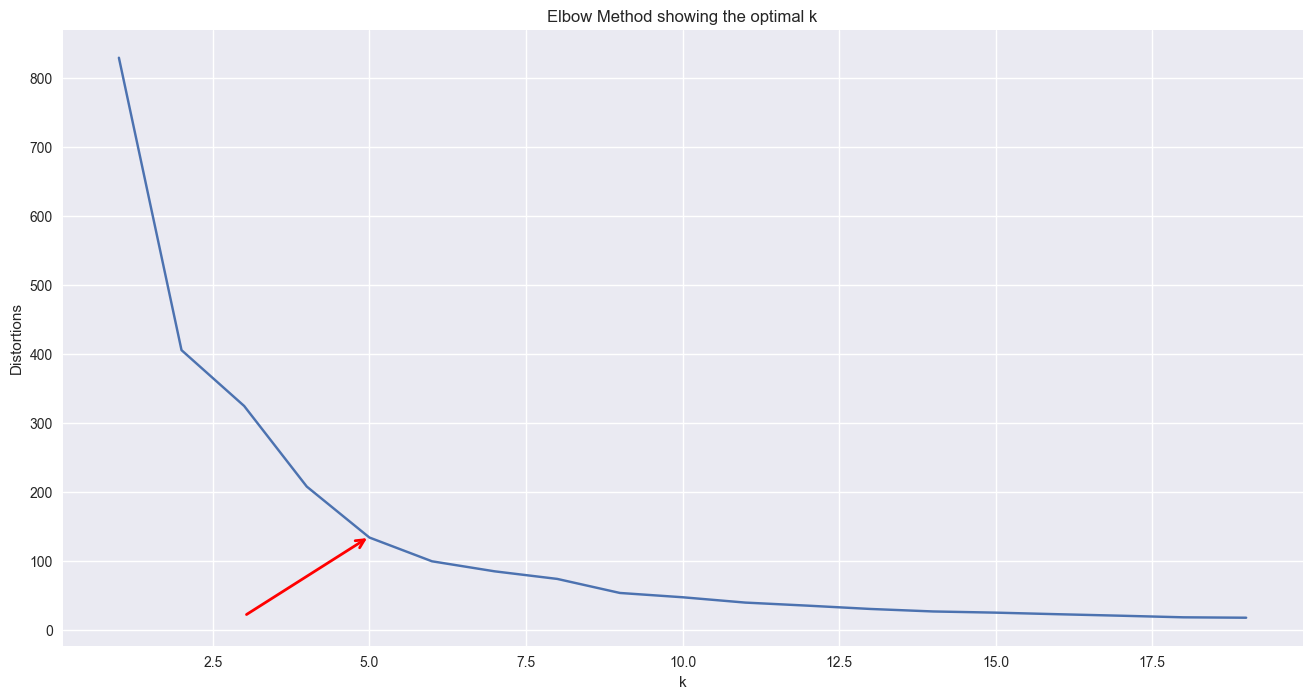

In [ ]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions_avg, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (5,135), xytext = (3,20), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()

In [ ]:
# Optimal number of clusters is the one that you decide based on the elbow plot
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(average_df)

In [ ]:
average_df['Cluster'] = pred_y

In [ ]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2, random_state=123)
reduced_features = pca.fit_transform(average_df.values)
average_df["pca_1"] = reduced_features[:,0]
average_df["pca_2"] = reduced_features[:,1]

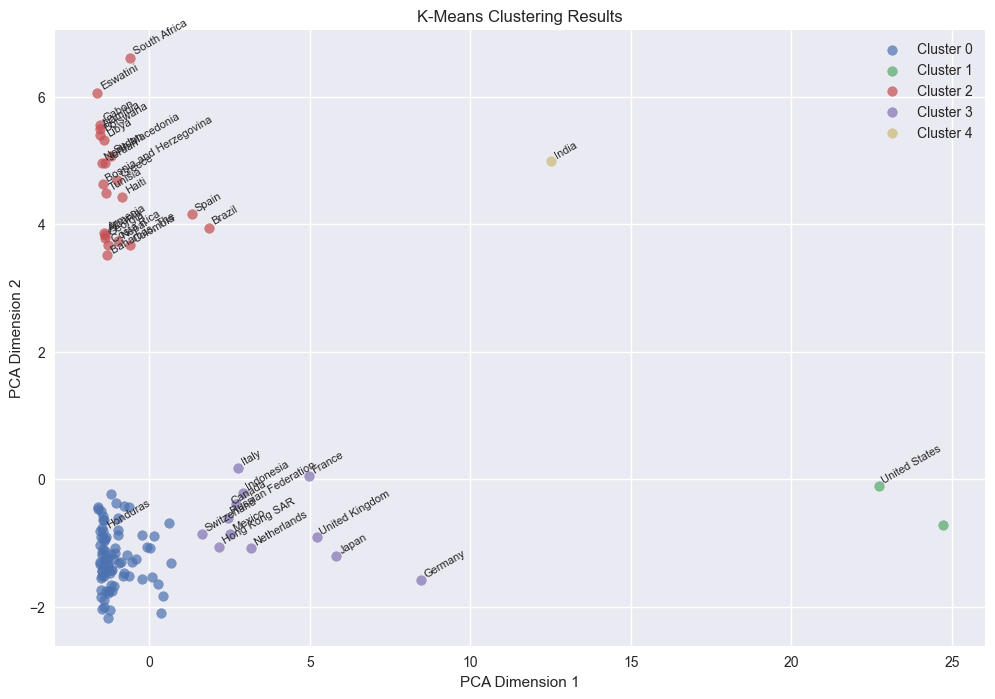

In [ ]:
plt.figure(figsize=(12,8))
clusters_to_label = [2,3,4]  # clusters you want to label

for cluster_label in range(optimal_clusters):
    cluster_data = average_df[average_df['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )
    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-0.2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(1, random_state = 201).iterrows():
            plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)


plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

General conspicuousness compared to the previous Cluster: The clusters are no longer so blurred and can be clearly distinguished from each other even with the "eye"

In [ ]:
# why are many countries located along a y-axe?
# it seems that GDP has a high influence in the cluster rating, maybe excluding usa and china would lead to a better distribution on the cluster scale

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Argentina,-0.183835,0.026254,-0.195720,-0.207983,0.026948,0.297025,0,-0.798552,-0.420691
Australia,0.419424,0.501355,0.474718,-0.174029,-0.104147,-0.404612,0,0.666941,-1.311182
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.230013,-0.205766,-0.343052,0,-1.389979,-1.126720
Bangladesh,-0.232424,-0.052265,-0.290965,0.467214,0.831152,-0.501521,0,-0.072259,-1.059945
Barbados,-0.373820,-0.232049,-0.402810,-0.229239,-0.270436,0.269105,0,-1.597550,-0.464765
Belarus,-0.290073,-0.203021,-0.296402,-0.196724,-0.210189,-0.545463,0,-1.283924,-1.350497
Belize,-0.376796,-0.233392,-0.404160,-0.230013,-0.269703,0.300044,0,-1.604812,-0.430944
Benin,-0.369959,-0.226990,-0.397419,-0.194580,-0.189672,-1.068972,0,-1.392336,-1.895115
Bolivia,-0.353832,-0.214616,-0.381766,-0.089687,-0.193805,-0.499636,0,-1.372298,-1.269327


In [ ]:

#Cluster 0
average_df[average_df['Cluster'] == 0]



,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Argentina,-0.183835,0.026254,-0.195720,-0.207983,0.026948,0.297025,0,-0.798552,-0.420691
Australia,0.419424,0.501355,0.474718,-0.174029,-0.104147,-0.404612,0,0.666941,-1.311182
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.230013,-0.205766,-0.343052,0,-1.389979,-1.126720
Bangladesh,-0.232424,-0.052265,-0.290965,0.467214,0.831152,-0.501521,0,-0.072259,-1.059945
Barbados,-0.373820,-0.232049,-0.402810,-0.229239,-0.270436,0.269105,0,-1.597550,-0.464765
...,...,...,...,...,...,...,...,...,...
Uruguay,-0.339299,-0.203408,-0.361065,-0.230013,-0.249584,0.244529,0,-1.490217,-0.495339
Vanuatu,-0.378421,-0.234122,-0.406409,-0.228486,-0.270252,-1.013054,0,-1.491525,-1.849725
Venezuela,-0.288184,-0.193699,-0.179411,-0.117637,-0.079608,-0.307319,0,-1.070499,-1.076563



Interpretation Cluster 0: 
- In general: relatively high developed countries with "averaged" population size. 
- The two emerging countries Indonesia and Mexico are conspicuous, as they do not realy fit in, as they do not correspond to the level of development of the other countries in this cluster. 



In [ ]:
#Cluster 1
average_df[average_df['Cluster'] == 1]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
"China, People's Republic of",5.711638,7.272997,7.275208,1.359914,9.054574,-0.512148,1,24.719110,-0.722982
United States,7.904593,10.621011,5.964129,0.978097,1.911862,-0.479026,1,22.722613,-0.111359


Interpretation Cluster 1: 
- Again, the cluster is a mix of emerging markets and developing countries. Obviously, the available information is not clear enough to distinguish them from each other. 
- The sizes of the countries also differ, although there are no particularly striking outliers.
- It is again surprising that Australia is assigned to this cluster. 

In [ ]:
#Cluster 2
average_df[average_df['Cluster'] == 2]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Albania,-0.363851,-0.226711,-0.394284,-0.188635,-0.253489,0.935752,2,-1.385067,3.836276
Armenia,-0.363962,-0.227725,-0.392992,-0.230013,-0.253637,0.964114,2,-1.401973,3.861258
"Bahamas, The",-0.368907,-0.228570,-0.396790,0.020991,-0.269610,0.612683,2,-1.304010,3.513104
Bosnia and Herzegovina,-0.354166,-0.223974,-0.384441,-0.228750,-0.250167,1.671219,2,-1.443338,4.624512
Botswana,-0.361979,-0.226083,-0.388913,-0.230013,-0.255597,2.394458,2,-1.524434,5.406369
Brazil,0.345728,0.677521,0.354002,0.209413,1.134297,0.911981,2,1.854892,3.947928
Colombia,-0.213303,-0.076368,-0.272362,0.263688,0.061427,0.707984,2,-0.604248,3.674375
Costa Rica,-0.328350,-0.202778,-0.348441,-0.217741,-0.238517,0.799139,2,-1.282194,3.679291
Eswatini,-0.374456,-0.232366,-0.402005,-0.230013,-0.264500,3.005160,2,-1.612568,6.067525


Interpretation Cluster 2: As before the United States do not correspond with all other countries and are therefore a separate cluster


In [ ]:
#Cluster 3
average_df[average_df['Cluster'] == 3]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Canada,1.068716,0.667034,1.103350,0.304236,-0.022244,-0.140297,3,2.706344,-0.390062
France,1.795131,1.137253,1.821235,1.798018,0.174824,0.175958,3,4.971490,0.046689
Germany,3.274316,1.741850,4.475505,-0.097010,0.279086,-0.730347,3,8.454086,-1.586656
Hong Kong SAR,1.357124,-0.056325,1.357304,-0.228803,-0.223025,-0.603053,3,2.184128,-1.062183
Indonesia,0.123040,0.323563,0.195771,2.706011,1.519748,-0.646813,3,2.913219,-0.210854
Italy,0.972237,0.772534,1.292140,-0.165295,0.123375,0.433147,3,2.780801,0.177906
Japan,1.702017,2.224796,1.891306,0.283117,0.564628,-0.877949,3,5.832373,-1.208723
Mexico,0.775968,0.381366,0.889228,0.298409,0.558581,-0.689604,3,2.514204,-0.854715
Netherlands,1.665032,0.227728,1.640240,0.258932,-0.156980,-0.640635,3,3.156894,-1.079932


Interpretation Cluster 3:
Unlike before, India and China are now issued as separate clusters. In both cases, the two countries are to be seen as separate clusters due to their extremely divergent populations. Due to the fact that there is now one cluster more and the two countries already showed a clear difference before, this separation is not surprising.

In [ ]:
#Cluster 4
average_df[average_df['Cluster'] == 4]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
India,1.053041,1.204454,1.111932,7.457924,8.926507,0.080513,4,12.52078,4.990446


Cluster 4: Unlike before, India and China are now issued as separate clusters. In both cases, the two countries are to be seen as separate clusters due to their extremely divergent populations. Due to the fact that there is now one cluster more and the two countries already showed a clear difference before, this separation is not surprising.

In [ ]:
#Cluster 5
average_df[average_df['Cluster'] == 5]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,


Cluster 5:
- A majority of the countries located in cluster 5 are designated as developing countries according to current classifications. 
- Nevertheless, there are again some outliers, e.g. Spain, which does not seem to fit into this cluster, but obviously shows a certain similarity based on population size, exposure to natural catastrophes, etc. The countries in this cluster are not classified as developing countries.
- Since some developing countries are already included in cluster 1, cluster 5 cannot be regarded as a complete cluster of less developed countries.